<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center><font size=8>Project 7: Unsupervised Learning </center></font></h1>
<h1><center><font size=6>TRADE & AHEAD</center></font></h1>

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Step 1 : Importing libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_theme(style='darkgrid')

from tabulate import tabulate

#format numeric data for easier readability
pd.set_option(
    "display.float_format", lambda x: "%.2f" % x
)  # to display numbers rounded off to 2 decimal places

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Finding optimal no. of clusters
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# mount from Google Drive

from google.colab import drive
drive.mount('/content/drive')

# loading the dataset(s)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Project 7/stock_data.csv')

# copying the data to another variable to avoid any changes to original data
df = data.copy()

Mounted at /content/drive


## Step 2: Perform exploratory data analysis (EDA)

## Data Overview & Quality Check

### 2.1 View the first and last 5 and random rows of the dataset

In [3]:
df.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines          42.35         10.00        1.69  135   
1        Pharmaceuticals          59.24          8.34        2.20  130   
2  Health Care Equipment          44.91         11.30        1.27   21   
3   Application Software          93.94         13.98        1.36    9   
4         Semiconductors          55.32         -1.83        1.70   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                  668129938.50       3.72      -8.78  
1                 1633015873.00      18.81      -8.75  
2                 1504421769.00      15.28      -0.39  
3                  499643650.80      74.56       4.20  
4                 2247993548.00     178.45       1.06

In [4]:
# LEts randomly select 10 rows from the sample dataset for loading

df.sample(n=10)

Ticker Symbol               Security             GICS Sector  \
20           AMAT  Applied Materials Inc  Information Technology   
209           MMC       Marsh & McLennan              Financials   
131          FLIR           FLIR Systems  Information Technology   
91            DHR          Danaher Corp.             Industrials   
249           PGR      Progressive Corp.              Financials   
144          GRMN            Garmin Ltd.  Consumer Discretionary   
192           LUV     Southwest Airlines             Industrials   
332          XRAY        Dentsply Sirona             Health Care   
96            DLR   Digital Realty Trust             Real Estate   
178           KIM           Kimco Realty             Real Estate   

                      GICS Sub Industry  Current Price  Price Change  \
20              Semiconductor Equipment          18.67         26.83   
209                   Insurance Brokers          55.45          6.02   
131  Electronic Equipment & Instruments          28.07          0.21   
91             Industrial Conglomerates          70.42          8.92   
249       Property & Casualty Insurance          31.80          3.52   
144                Consumer Electronics          37.17          3.39   
192                            Airlines          43.06         13.86   
332                Health Care Supplies          60.85         19.90   
96                    Specialized REITs          75.62         15.57   
178                               REITs          26.46          8.71   

     Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  \
20         1.46   18         131     1795000000  1377000000   
209        1.03   25          99     -584000000  1599000000   
131        1.76   15          81      -58589000   241686000   
91         1.19   14          13    -2214800000  3357400000   
249        1.09   17          99      116000000  1267600000   
144        1.67   14         121     -363198000   456227000   
192        1.54   30          41      301000000  2181000000   
332        1.01   11          60      133000000   251200000   
96         1.07    7          39       22239000   296689000   
178        1.22   18          47        2212000   894115000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
20                 1.13                 1218584071.00      16.52       3.86  
209                3.01                  531229235.90      18.42      -1.95  
131                1.73                  139702890.20      16.23       4.01  
91                 4.81                  698004158.00      14.64     -13.76  
249                2.16                  586851851.90      14.72      -0.84  
144                2.39                  190889958.20      15.55       5.76  
192                3.30                  660909090.90      13.05      -5.12  
332                1.79                  140335195.50      33.99       0.86  
96                 1.56                  190185256.40      48.47      -7.49  
178                2.01                  444833333.30      13.16      -1.27

In [5]:
df.tail(5)

Ticker Symbol                Security             GICS Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
335  Internet Software & Services          33.26         14.89        1.85   
336                   Restaurants          52.52         -8.70        1.48   
337         Health Care Equipment         102.59          9.35        1.40   
338                Regional Banks          27.30         -1.16        1.47   
339               Pharmaceuticals          47.92         16.68        1.61   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
335                  939457327.60      28.98       6.26  
336                  435353535.40      17.68      -3.84  
337                  188461538.50     131.53     -23.88  
338                  257892500.00      22.75      -0.06  
339                  498529411.80      70.47       1.72

### 2.2 View the shape of the dataset

In [6]:
df.shape


(340, 15)

### 2.3 View the datatypes of the dataset

In [7]:
df.dtypes

Ticker Symbol                    object
Security                         object
GICS Sector                      object
GICS Sub Industry                object
Current Price                   float64
Price Change                    float64
Volatility                      float64
ROE                               int64
Cash Ratio                        int64
Net Cash Flow                     int64
Net Income                        int64
Earnings Per Share              float64
Estimated Shares Outstanding    float64
P/E Ratio                       float64
P/B Ratio                       float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

### 2.4 Check for duplicate values

In [9]:
df[df.duplicated()].count()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [10]:
df.duplicated().sum()

0

### 2.5 Check for missing values

In [11]:
# let's verify if there are missing values in the data

data.isnull().sum().sort_values(ascending=False)  # sort descending

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

### 2.6 Checking for unique values of each column

In [12]:
###Checking for unique values of each column

print("Unique values in dataset: \n\n",df.nunique())

Unique values in dataset: 

 Ticker Symbol                   340
Security                        340
GICS Sector                      11
GICS Sub Industry               104
Current Price                   336
Price Change                    340
Volatility                      340
ROE                              82
Cash Ratio                      124
Net Cash Flow                   332
Net Income                      335
Earnings Per Share              268
Estimated Shares Outstanding    323
P/E Ratio                       295
P/B Ratio                       299
dtype: int64


**Data Overview Observations**
- Data set loaded properly as per random display, first and last five rows
- There are 340 records and 15 columns (features)
- There are no duplicate records in the datasets and no missing values making this a quality dataset and also means we do not have to carry out any data impute.
- There are 3 different datatypes in the dataset : float64(7), int64(4), object(4).
- The object datatype should be converted to category for memory conservation
- We will drop unnecessary independent variable - ticker symbol as it does not contribute to useful information
- There are 340 unique ticker symbols, indicating that there are 340 different securities in the dataset. As each ticker symbol appears only once, it also verifies that there are no duplicate symbols.
- There are 336 unique values in the "Current Price" column. We will carry out further statistical analysis such as the min, max, mean, and standard deviation of the current prices to understand the distribution of prices across the dataset.
- The "Price Change" column contains 340 unique values. We will also have a look at the statistical price changes such as the average, maximum and minimum price changes to examine the distribution of price changes (shift in the value - volatility of stocks / supply & demand).
- The "Volatility" column also contains 340 unique values. We will also have a look at the statistical average of this feature, identifying the most and least volatile securities, and explore the relationship between volatility and other variables in the dataset in the later part of the EDA.


### 2.7 Lets breakdown or verify the categorical data further

In [13]:
df.describe(include = 'object')

Ticker Symbol                 Security  GICS Sector  \
count            340                      340          340   
unique           340                      340           11   
top              AAL  American Airlines Group  Industrials   
freq               1                        1           53   

                         GICS Sub Industry  
count                                  340  
unique                                 104  
top     Oil & Gas Exploration & Production  
freq                                    16

In [14]:
# filtering object type columns
cat_columns = data.describe(include=["object"]).columns
cat_columns

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry'], dtype='object')

In [15]:
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 40)
    print("\n")
    print(data[i].describe())
    print("*" * 40)
    print("\n")

AAL     1
NEE     1
NUE     1
NTRS    1
NSC     1
       ..
EQR     1
EQIX    1
EOG     1
EMN     1
ZTS     1
Name: Ticker Symbol, Length: 340, dtype: int64
****************************************


count     340
unique    340
top       AAL
freq        1
Name: Ticker Symbol, dtype: object
****************************************


American Airlines Group    1
NextEra Energy             1
Nucor Corp.                1
Northern Trust Corp.       1
Norfolk Southern Corp.     1
                          ..
Equity Residential         1
Equinix                    1
EOG Resources              1
Eastman Chemical           1
Zoetis                     1
Name: Security, Length: 340, dtype: int64
****************************************


count                         340
unique                        340
top       American Airlines Group
freq                            1
Name: Security, dtype: object
****************************************


Industrials                    53
Financials         

**Observation of Categorical Statistical Summary**
- The count of each categorical columns is 340 which verifies further that there are no missing values
-  There are 11 unique Global Industry Classification Standard (GICS) sectors in the dataset. The most frequently occurring sector is "Industrials" with a count of 53.
- The GICS Sub Industry column provides more specific sub-industry classifications based on the GICS system. There are 104 unique sub-industries in the dataset and the most common sub-industry is "Oil & Gas Exploration & Production," appearing 16 times.

### 2.8 Display Statistical Summary

In [16]:
# lets look at the numerical features.
df.describe().T

count          mean           std  \
Current Price                340.00         80.86         98.06   
Price Change                 340.00          4.08         12.01   
Volatility                   340.00          1.53          0.59   
ROE                          340.00         39.60         96.55   
Cash Ratio                   340.00         70.02         90.42   
Net Cash Flow                340.00   55537620.59 1946365312.18   
Net Income                   340.00 1494384602.94 3940150279.33   
Earnings Per Share           340.00          2.78          6.59   
Estimated Shares Outstanding 340.00  577028337.75  845849595.42   
P/E Ratio                    340.00         32.61         44.35   
P/B Ratio                    340.00         -1.72         13.97   

                                         min           25%          50%  \
Current Price                           4.50         38.55        59.70   
Price Change                          -47.13         -0.94         4.82   
Volatility                              0.73          1.13         1.39   
ROE                                     1.00          9.75        15.00   
Cash Ratio                              0.00         18.00        47.00   
Net Cash Flow                -11208000000.00 -193906500.00   2098000.00   
Net Income                   -23528000000.00  352301250.00 707336000.00   
Earnings Per Share                    -61.20          1.56         2.90   
Estimated Shares Outstanding     27672156.86  158848216.10 309675137.80   
P/E Ratio                               2.94         15.04        20.82   
P/B Ratio                             -76.12         -4.35        -1.07   

                                       75%            max  
Current Price                        92.88        1274.95  
Price Change                         10.70          55.05  
Volatility                            1.70           4.58  
ROE                                  27.00         917.00  
Cash Ratio                           99.00         958.00  
Net Cash Flow                 169810750.00 20764000000.00  
Net Income                   1899000000.00 24442000000.00  
Earnings Per Share                    4.62          50.09  
Estimated Shares Outstanding  573117457.32  6159292035.00  
P/E Ratio                            31.76         528.04  
P/B Ratio                             3.92         129.06

**Some Observation to Note from the statistical summary of the entire dataset :**

1. Current Price:
- The mean current price is 80.86, with a standard deviation of 98.06. This indicates a relatively high degree of variability in the prices which may be contributing to the higher mean value.
- The minimum price is 4.50, and the maximum price is 1,274.95, showing a wide range of prices.
- The median (50th percentile) price is 59.70, indicating that half of the prices are below this value.
- Since the mean is higher than the median, there may likely be a positive skewness in the distribution.

2. Price Change:
- The mean price change is 4.08, with a standard deviation of 12.01. This suggests moderate variability in price changes.
- The minimum price change is -47.13, indicating a significant decrease in price, while the maximum price change is 55.05, indicating a substantial increase.

3. Volatility
- Overall, the volatility statistics suggest that the dataset contains securities with varying levels of price fluctuations, ranging from relatively low (0.73) to higher levels (4.58) of volatility.

4. Return On Equity (ROE)
- The mean ROE is 39.60%, with a standard deviation of 96.55%. This indicates a high degree of variability in ROE values.
- The minimum ROE is 1.00%, and the maximum ROE is 917.00%, showing a wide range of return on equity as well.
- A median ROE of 15.00% suggests that there is an equal number of companies with ROE values higher and lower than this percentage in the dataset.

5. Cash Ratio:
- The mean cash ratio is 70.02, and a standard deviation of 90.42. This suggests wide variation in cash ratios across the dataset.
- The minimum cash ratio is 0.00, indicating that some companies have no cash reserves, while the maximum cash ratio is 958.00.

6. Net Cash Flow:
- The minimum net cash flow is USD(-11,208,000,000.00), indicating a significant negative cash flow, while the maximum net cash flow is USD20,764,000,000.00.

7. Net Income:
- The mean net income is USD 1,494,384,602.94 and the standard deviation of USD 3,940,150,279.33 indicate a wide variation in net income across the dataset. This suggests that there are companies in the dataset experiencing a range of profitability, with some reporting significant losses and others reporting substantial profits.
- The minimum net income is USD -23,528M, indicating significant losses, while the maximum net income is USD 24,442M.00.

8. Earnings Per Share:

- The mean earnings per share is 2.78, indicating the average profitability per share. Companies with higher earnings per share are considered more financially attractive to investors.
- The minimum earnings per share is -61.20, which suggests that some companies in the dataset have reported losses per share. Negative earnings per share can indicate financial challenges or poor performance if the said company.
- The maximum earnings per share is 50.09, indicating the highest profitability per share reported in the dataset. Companies with higher earnings per share are generally considered more lucrative to investors.

9. Estimated Shares Outstanding:
- This provides an insight into the size and scale of the companies in the dataset.
- The mean estimated shares outstanding is 577,028,337.75, representing the average number of shares estimated to be outstanding (total number of shares that a corporation has issued to investors)
- The minimum estimated shares outstanding is approx 27.7M, indicating the smallest estimated number of shares outstanding.
- The maximum estimated shares outstanding is 6,159M, representing the largest estimated number of shares outstanding. This suggests the presence of larger companies with potentially broader ownership.

10, P/E Ratio:

- The mean P/E (Price-to-Earnings) ratio is 32.61, indicating the average valuation of a company's stock relative to its earnings per share. A higher P/E ratio generally suggests a stock's price is high relative to earnings and possibly overvalued and also that investors are willing to pay a price for the company's future earnings potential.
- The minimum P/E ratio is 2.94, suggesting that the current stock price is low relative to earnings. This may indicate that a company may currently be undervalued or that the company is doing exceptionally well relative to its past trends.
- The maximum P/E ratio is 528.04, indicating a higher valuation relative to earnings for certain companies. This may suggest overvalued stocks.

11. P/B Ratio:

- The mean P/B (Price-to-Book) ratio is -1.72, representing the average valuation of a company's stock relative to its book value per share. A negative P/B ratio can occur when a company's stock is trading below its book value, which might suggest undervaluation.
- The minimum P/B ratio is -76.12, indicating relatively lower valuation compared to book value for some companies. This suggests potential undervalued stocks.
- The maximum P/B ratio is 129.06, indicating a higher valuation relative to book value for certain companies. This may indicate overvaluation.

## Step 3 : Visual Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Some EDA Explorations**:
<font color = 'red'>
1. What does the distribution of stock prices (ie. current price) look like? <font color ='black'> (Ans : 3.1c)

<font color ='black'> (Following Questions answered in Bivariate Analysis)
<font color = 'red'>
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Predefined EDA Functions

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="viridis",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [18]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(df, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## 3.1 Univariate Analysis

### a. Observation of GICS Sector

In [19]:
df["GICS Sector"].value_counts(normalize=True)*100

Industrials                   15.59
Financials                    14.41
Health Care                   11.76
Consumer Discretionary        11.76
Information Technology         9.71
Energy                         8.82
Real Estate                    7.94
Utilities                      7.06
Materials                      5.88
Consumer Staples               5.59
Telecommunications Services    1.47
Name: GICS Sector, dtype: float64

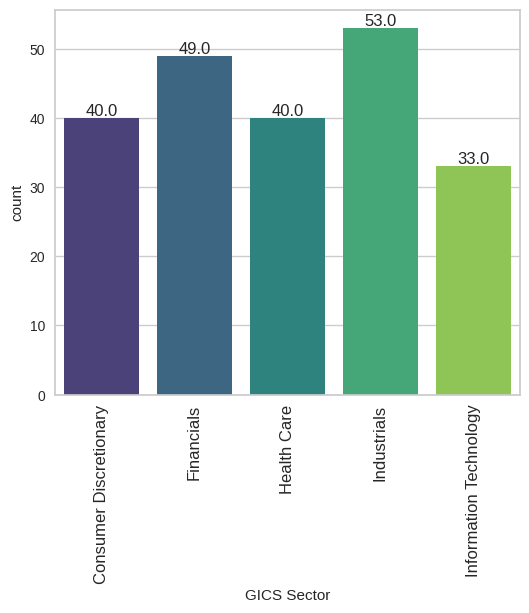

In [20]:
# barplot visualization of stocks by sector
labeled_barplot(df, 'GICS Sector', n=5)

- From the given information and visual, we can see that the "Industrials" sector has the highest securities count with 53 companies (15.59%), followed by "Financials" with 49 companies (14.41%).
- Top 5 economic sectors are : Industrial, Financials, Consumer Discretionary and Health Care at 11.76% and IT at 9.7%
- Minority securities belongs to Telecommunication Services at 1.5%

### b. Observation of GICS Sub Industry

In [21]:
df["GICS Sub Industry"].value_counts(normalize=True)*100

Oil & Gas Exploration & Production                4.71
REITs                                             4.12
Industrial Conglomerates                          4.12
Electric Utilities                                3.53
Internet Software & Services                      3.53
Health Care Equipment                             3.24
MultiUtilities                                    3.24
Banks                                             2.94
Property & Casualty Insurance                     2.35
Diversified Financial Services                    2.06
Biotechnology                                     2.06
Pharmaceuticals                                   1.76
Packaged Foods & Meats                            1.76
Oil & Gas Refining & Marketing & Transportation   1.76
Semiconductors                                    1.76
Diversified Chemicals                             1.47
Consumer Finance                                  1.47
Integrated Oil & Gas                              1.47
Industrial

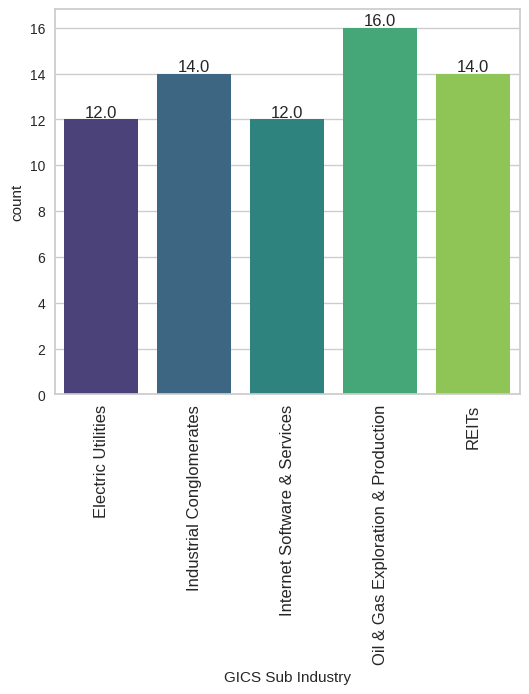

In [22]:
# barplot visualization of sub industry for top 5
labeled_barplot(df, 'GICS Sub Industry', n=5)

The top 5 sub-industries with the highest count of stocks include
 - Oil & Gas Exploration & Production, REITs, Industrial Conglomerates, Electric Utilities, and Internet Software & Services.

Note :
- Although the "Oil & Gas Exploration & Production" GICS Subsector has a higher value compared to other GICS Subsectors, it falls under the broader GICS sector "Energy," which has a lower mean value compared to other sectors such as "Industrials" and "Financials."

### c. Observing all the numerical features at one go (Univariate Analysis)

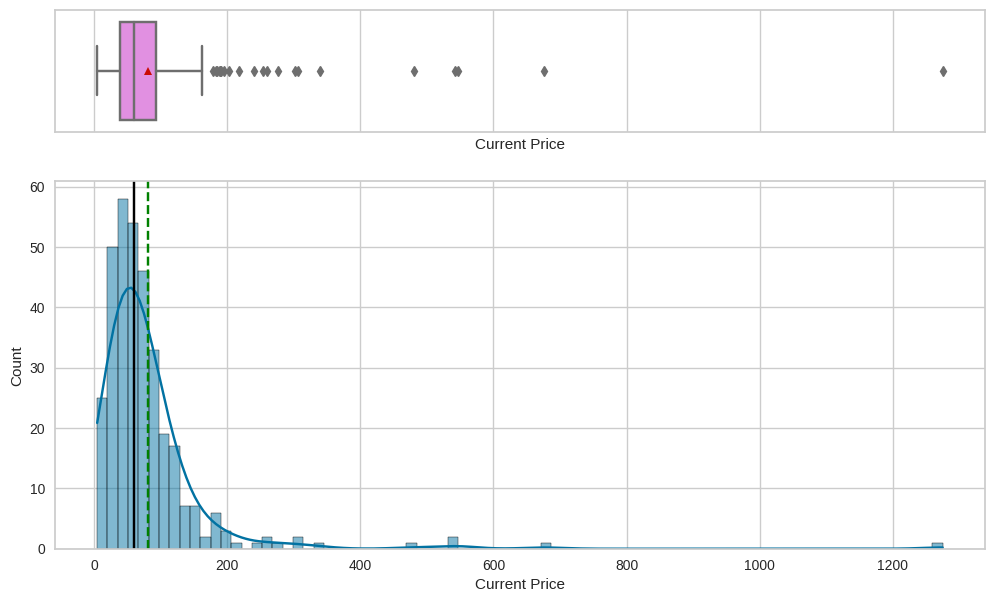

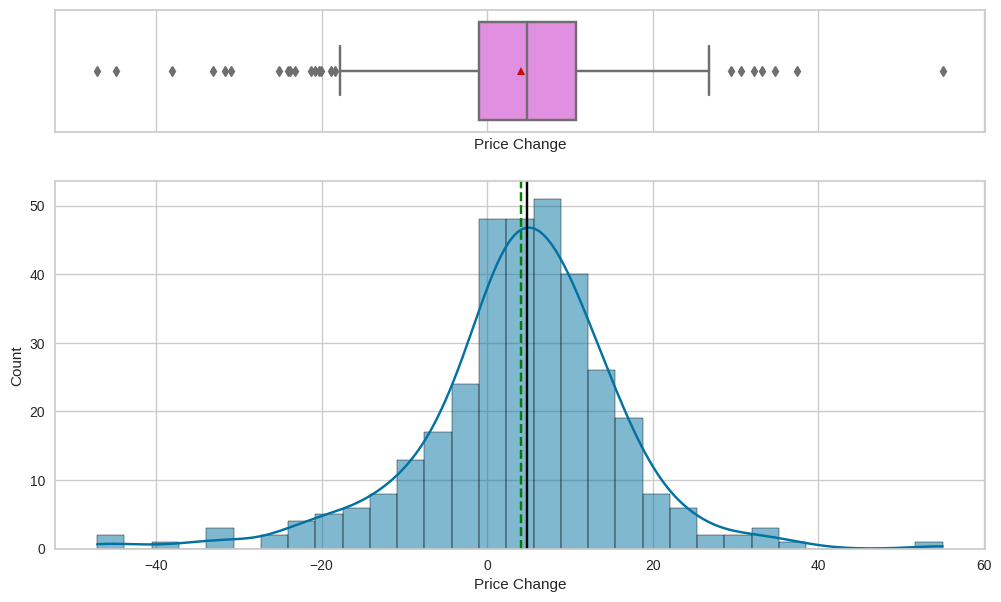

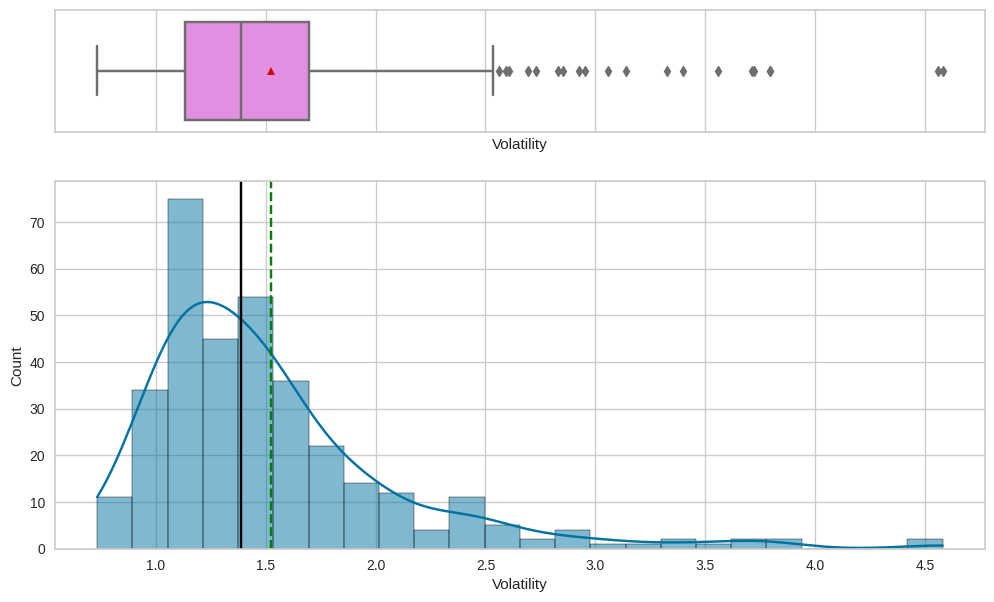

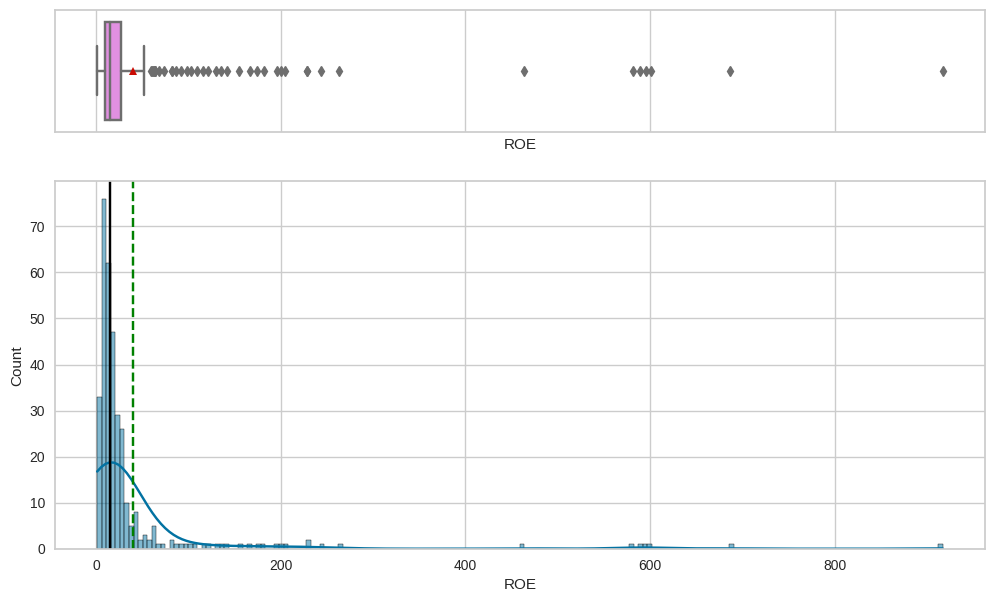

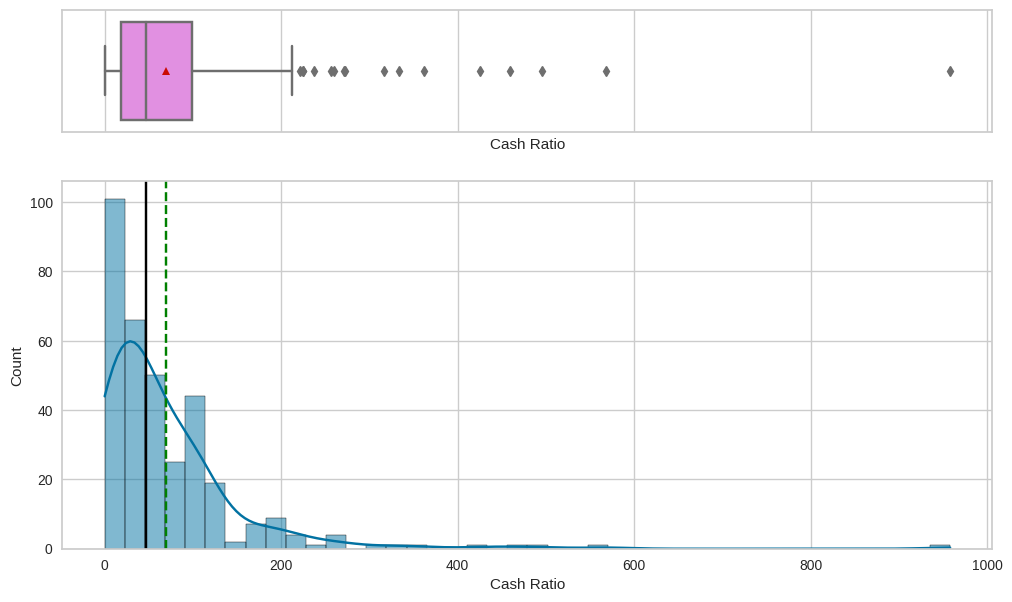

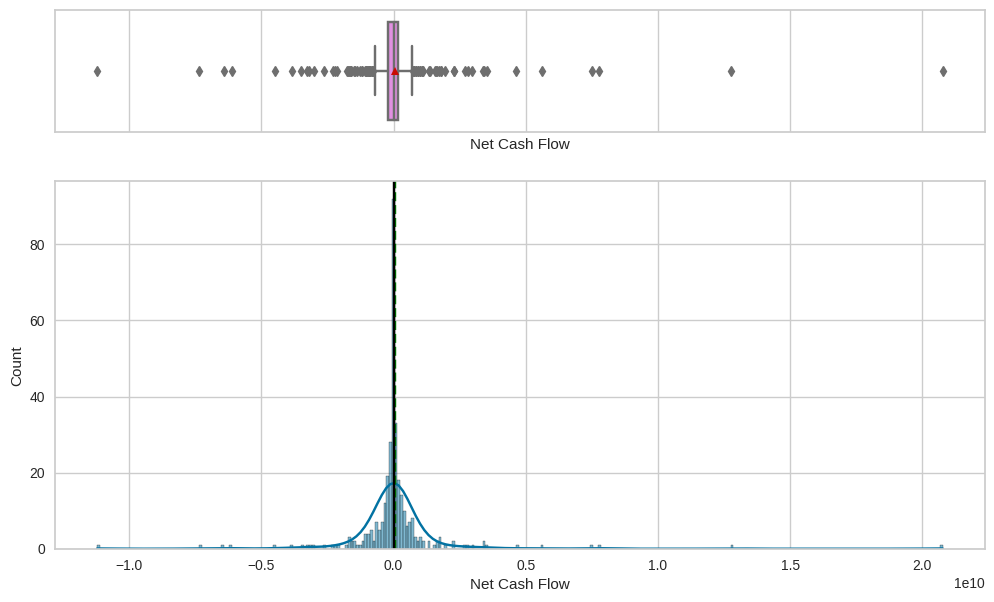

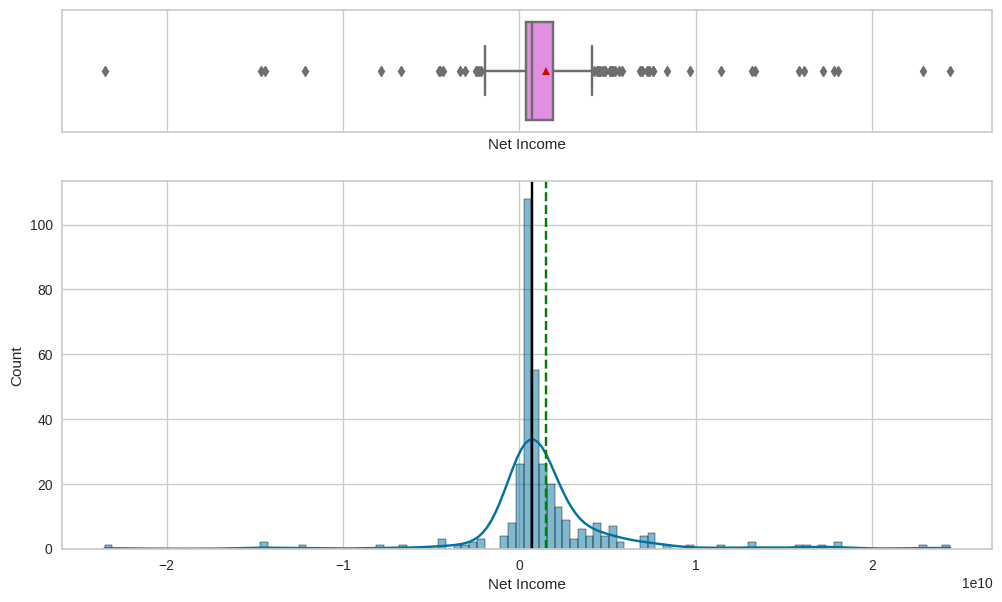

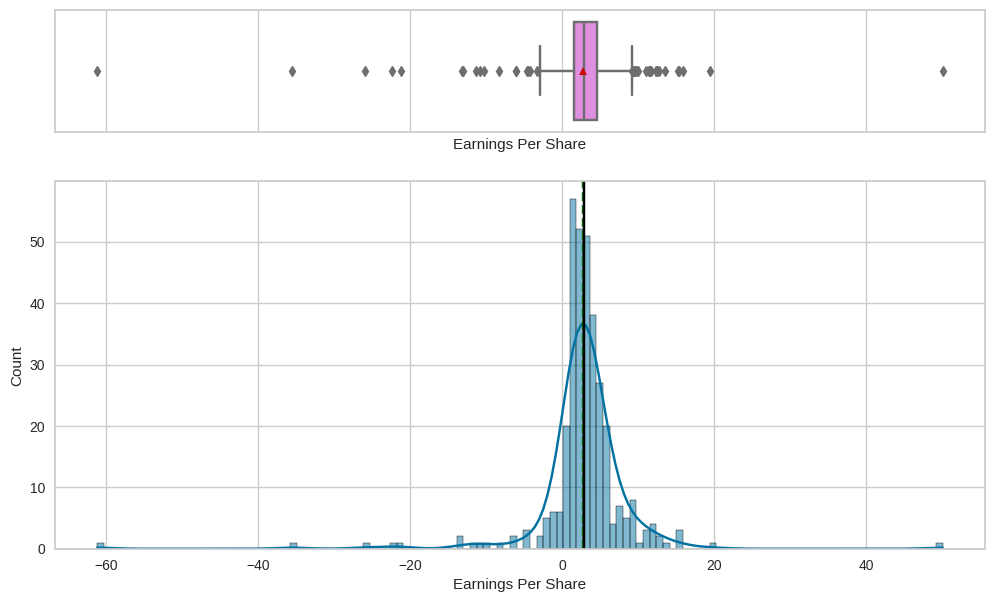

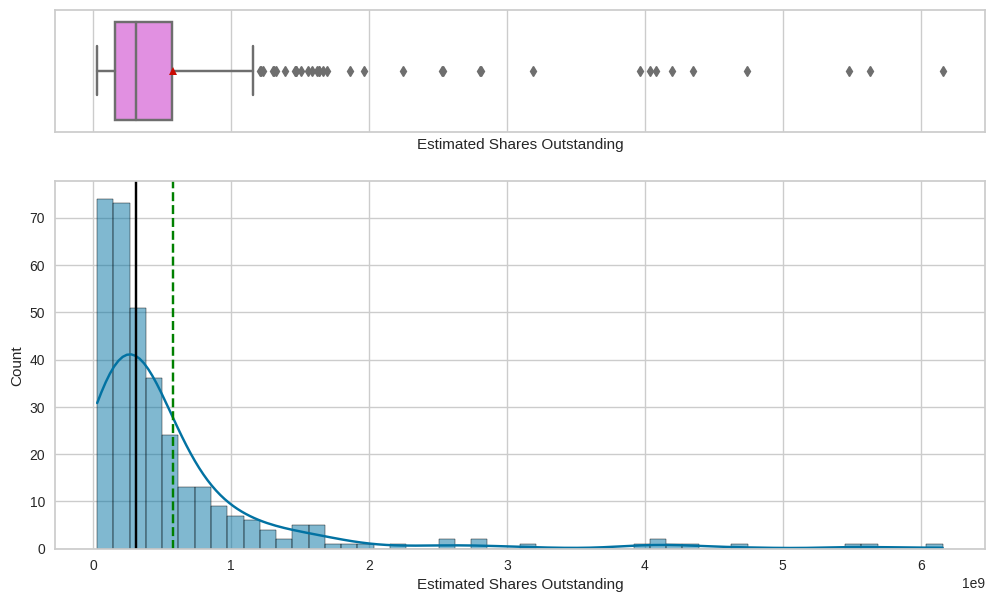

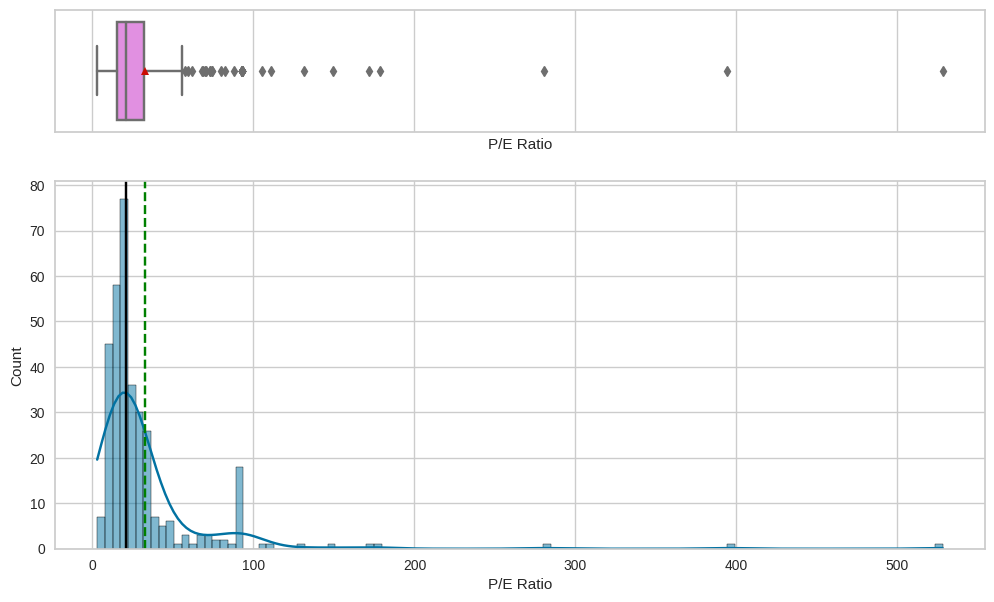

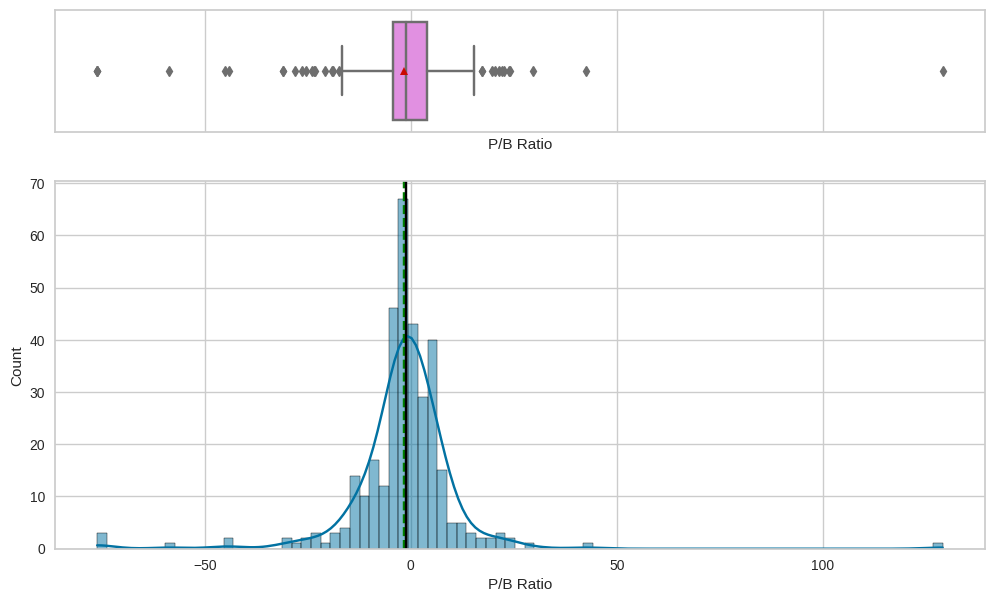

In [23]:
# filter the columns of the dataframe with numeric datatypes only
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

for feature in numeric_columns:
    histogram_boxplot(
        df, feature, figsize=(12, 7), kde=True, bins=None)

**Summary Observations**

It can be noted that

- Features : Current Price (Current Stock Price), Volatility, ROE (Return on Equity), Cash Ratio, Net Cash Flow, Net Income, Estimated Shares Outstanding and P/E Ratio exhibit a right skew, as their mean values are higher than their respective median values.

- The presence of outliers on both ends of the boxplots such as for Price Change, Net Cash Flow, Net Income, Earnings Per Share and P/B Ratio indicates that there are both very large positive and very large negative changes in price within the dataset.

- Although some of the variables contain outliers, the values may be reaistic as we are dealign with stock prices.

- However, k-means clustering is sensitive to outliers and can have a substantial impact on the results of k-means clustering. Hence, we will carry out outlier detection andremoval.



### d. Observation of Earnings Per Share

In [24]:
#top 5 companies with EPS
top_5_companies = df.nlargest(5, 'Earnings Per Share')
top_5_companies = top_5_companies[['Security', 'GICS Sector','Earnings Per Share']]

table = top_5_companies.values.tolist()
headers = top_5_companies.columns.tolist()

print('Top 5 EPS Companies')
#using tabulate to reate a nice table
print(tabulate(table, headers, tablefmt="fancy_grid"))

# Add a line break
print("\n")

lowest_eps_companies = df.nsmallest(3, 'Earnings Per Share')
lowest_eps_companies = lowest_eps_companies[['Security', 'GICS Sector','Earnings Per Share']]
table2 = lowest_eps_companies.values.tolist()
headers2 = lowest_eps_companies.columns.tolist()

print('Lowest 3 EPS Companies')
#using tabulate to create a nice table
print(tabulate(table2, headers2, tablefmt="fancy_grid"))


Top 5 EPS Companies
╒═════════════════════════════╤════════════════════════╤══════════════════════╕
│ Security                    │ GICS Sector            │   Earnings Per Share │
╞═════════════════════════════╪════════════════════════╪══════════════════════╡
│ Priceline.com Inc           │ Consumer Discretionary │                50.09 │
├─────────────────────────────┼────────────────────────┼──────────────────────┤
│ United Continental Holdings │ Industrials            │                19.52 │
├─────────────────────────────┼────────────────────────┼──────────────────────┤
│ Intuitive Surgical Inc.     │ Health Care            │                15.87 │
├─────────────────────────────┼────────────────────────┼──────────────────────┤
│ BIOGEN IDEC Inc.            │ Health Care            │                15.38 │
├─────────────────────────────┼────────────────────────┼──────────────────────┤
│ Chipotle Mexican Grill      │ Consumer Discretionary │                15.3  │
╘═══════════════════

EPS is an important indicator of a company's profitability on a per-share basis and is widely used by investors in evaluating stock performance.
 - Consumer Discretionary sector seem to have the highest EPS among the top 5 companies with a value of 50.09. This indicates that this company is generating a significant amount of net profit relative to its outstanding
 - On the other hand, the lowest 3 EPS (Earnings Per Share) companies are from the Energy sector with negative EPS values.

## 3.2 Bivariate Analysis

### a. Observation on Economic Sector and Stock Price

***Which economic sector have seen the maximum price increase on average?***

In [25]:
# Calculate the average price change for each economic sector
df.groupby('GICS Sector')['Price Change'].mean().sort_values(ascending=False)

GICS Sector
Health Care                     9.59
Consumer Staples                8.68
Information Technology          7.22
Telecommunications Services     6.96
Real Estate                     6.21
Consumer Discretionary          5.85
Materials                       5.59
Financials                      3.87
Industrials                     2.83
Utilities                       0.80
Energy                        -10.23
Name: Price Change, dtype: float64

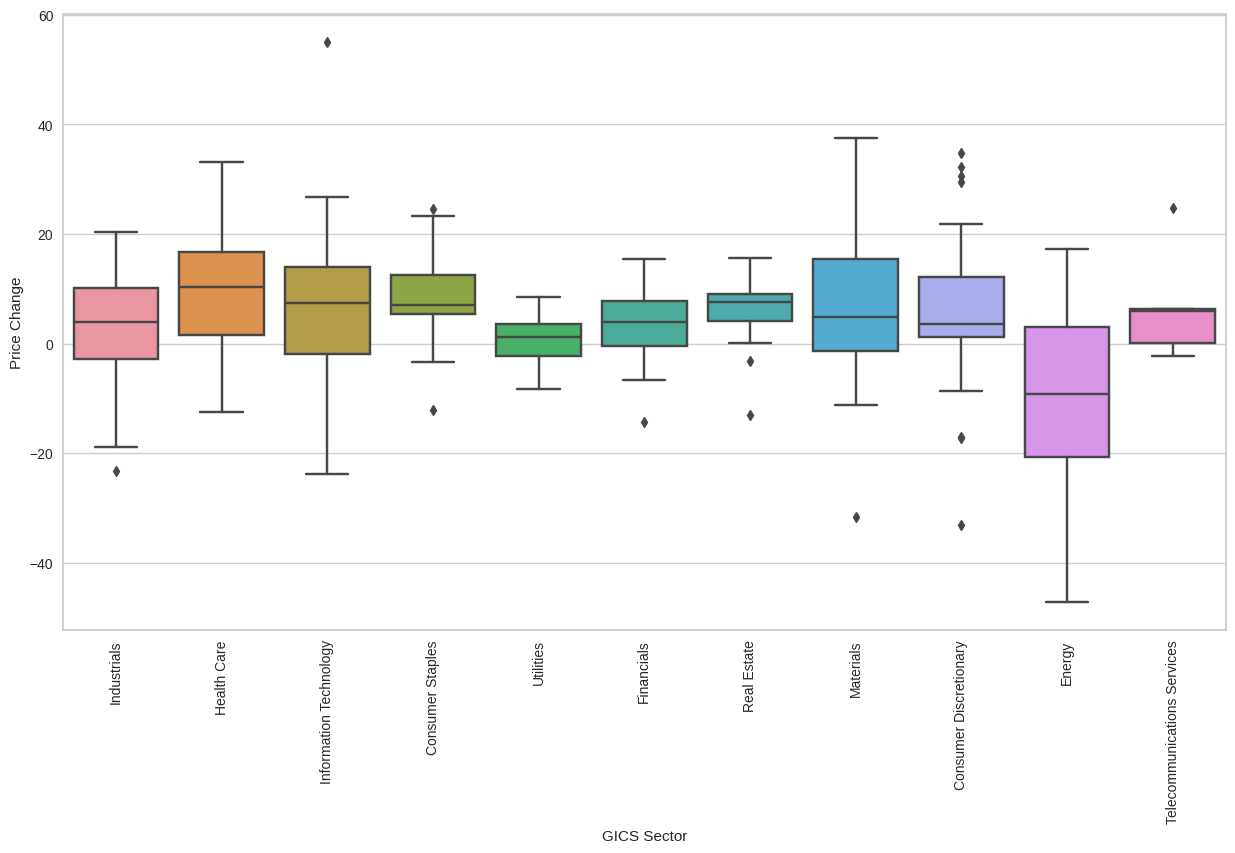

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='GICS Sector', y='Price Change')
plt.xticks(rotation=90);

In [27]:
# Calculate the average price change for each economic sector
average_price_change = df.groupby('GICS Sector')['Price Change'].mean()

#Identify the economic sector with the maximum average price change
max_price_change_sector = average_price_change.idxmax()

print("The stocks from", max_price_change_sector, "sector have seen the maximum price increase on average.")

The stocks from Health Care sector have seen the maximum price increase on average.


***Observation and Answer ***

- Frm the boxplot visual, the Health Care sector showed the highest mean value which is further verified from the list of GICS Sectors, with the maximum price increase on average at 9.59
- This indicates that, on average, companies within the Health Care sector have experienced positive growth in their stock prices.
- Information Technology sectors also show relatively high average price increases.
- Energy sector has experienced a significant average price decrease of -10.23%
-	The Financials and Industrials sectors have relatively lower average price increases compared to other sectors, with 3.87% and 2.83% respectively. This suggests a moderate growth trend in these sectors.
-	The Utilities sector has the lowest average price increase at 0.80%, indicating relatively lower stock price growth compared to other sectors.


### b. Correlation of Variables

***How are the different variables correlated with each other?***

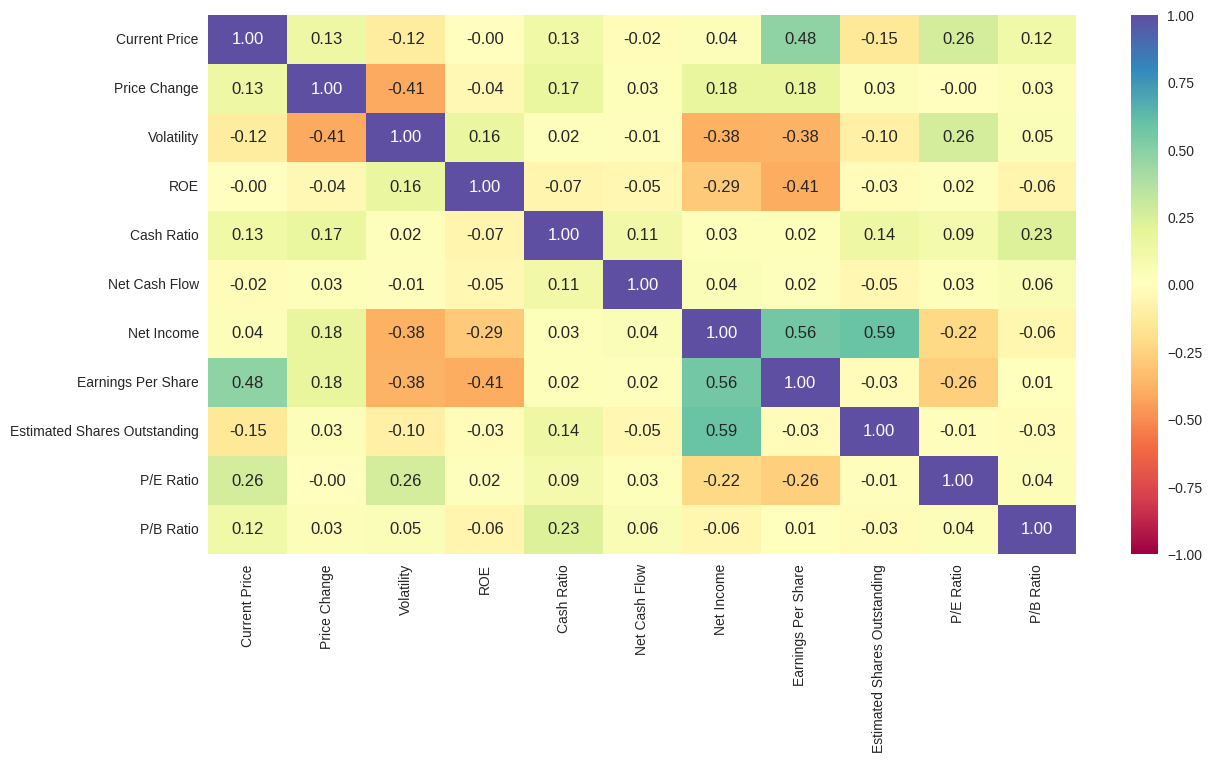

In [28]:
#lets create a correlation heat map for the numerical variables
# numeric columns was defined ealrier above. Hence not requiured to repeat. Below for reference only
# numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap='Spectral'
)
plt.show()

Observation of correlation between the following variables:

"Net Income" has the highest positive correlation with both "Estimated Shares Outstanding" and "Earnings Per Share,". This means that these variables have a strong linear relationship with each other.

**Below are the potive correlation between variables :**

<Font color = 'Blue'> Net Income and Estimated Shares Outstanding:
- has the highest correlation, although a moderate value.
- this relationship also indicates that companies with higher net income may choose to issue more shares. (As the net income of a company increases, the estimated number of shares outstanding also tends to increase). THe drawback of this is that, this can dilute the ownership stake of existing shareholders.

<Font color = 'Blue'> Net Income and Earnings Per Share:
- A positive correlation between "Net Income" and "Earnings Per Share" indicates that as the net income of a company increases, the earnings per share also tend to increase.
- This relationship implies that as a company's net income grows, it generates higher profits on a per-share basis.

<Font color = 'Blue'> Earnings_Per_Share and Current_Price:
- correlation indicates that there is a tendency for the earnings per share of a company to increase as the current price of its stock increases.
- EPS represents a portion of earning (company's profitability) allocated to each outstanding share while current price reflects the market's perception of the company's value and future prospects.

**Below are the negative correlation between variables :**

"Volatility" has a negative correlation of -0.38 with both "Net Income" and "Earnings Per Share". THis means that there is a tendency for higher volatility to be associated with lower levels of net income and earnings per share.

<Font color = 'Blue'>Price_Change and Volatility :
- This means that as the price change of a stock decreases, the volatility tends to increase, and vice versa.

<Font color = 'Blue'>Earnings_Per_Share and ROE:
 -  as earnings per share increase, there is a tendency for the return on equity(ROE) to decrease, and vice versa
 - it means that as the company focuses on increasing earnings per share, it may come at the expense of a lower return on equity.
 - negative correlation between EPS and ROE can be influenced by various factors, such as capital structure decisions, debt levels, and the company's overall financial performance.

<Font color = 'Blue'>Earnings_Per_Share and Volatility
- there is a tendency for higher earnings per share to be associated with lower levels of volatility, and vice versa.
- it means that as a company's earnings per share increase, there tends to be lower price volatility in its stock.
- Higher earnings per share can be perceived as a positive indication of a company's financial health and profitability. As a result, investors may view the stock as less risky or more attractive, leading to decreased price volatility.

<Font color = 'Blue'> Net income and Volatility
- as net income increases, there is a tendency for volatility to decrease, and vice versa.
- A negative correlation between net income and volatility suggests that as a company's net income (profit after expenses) increases, there tends to be lower price volatility in its stock. This could indicate that higher profitability perceived by invesotrs can contribute to decreased price volatility as investors view the stocks as less risky to more stable.

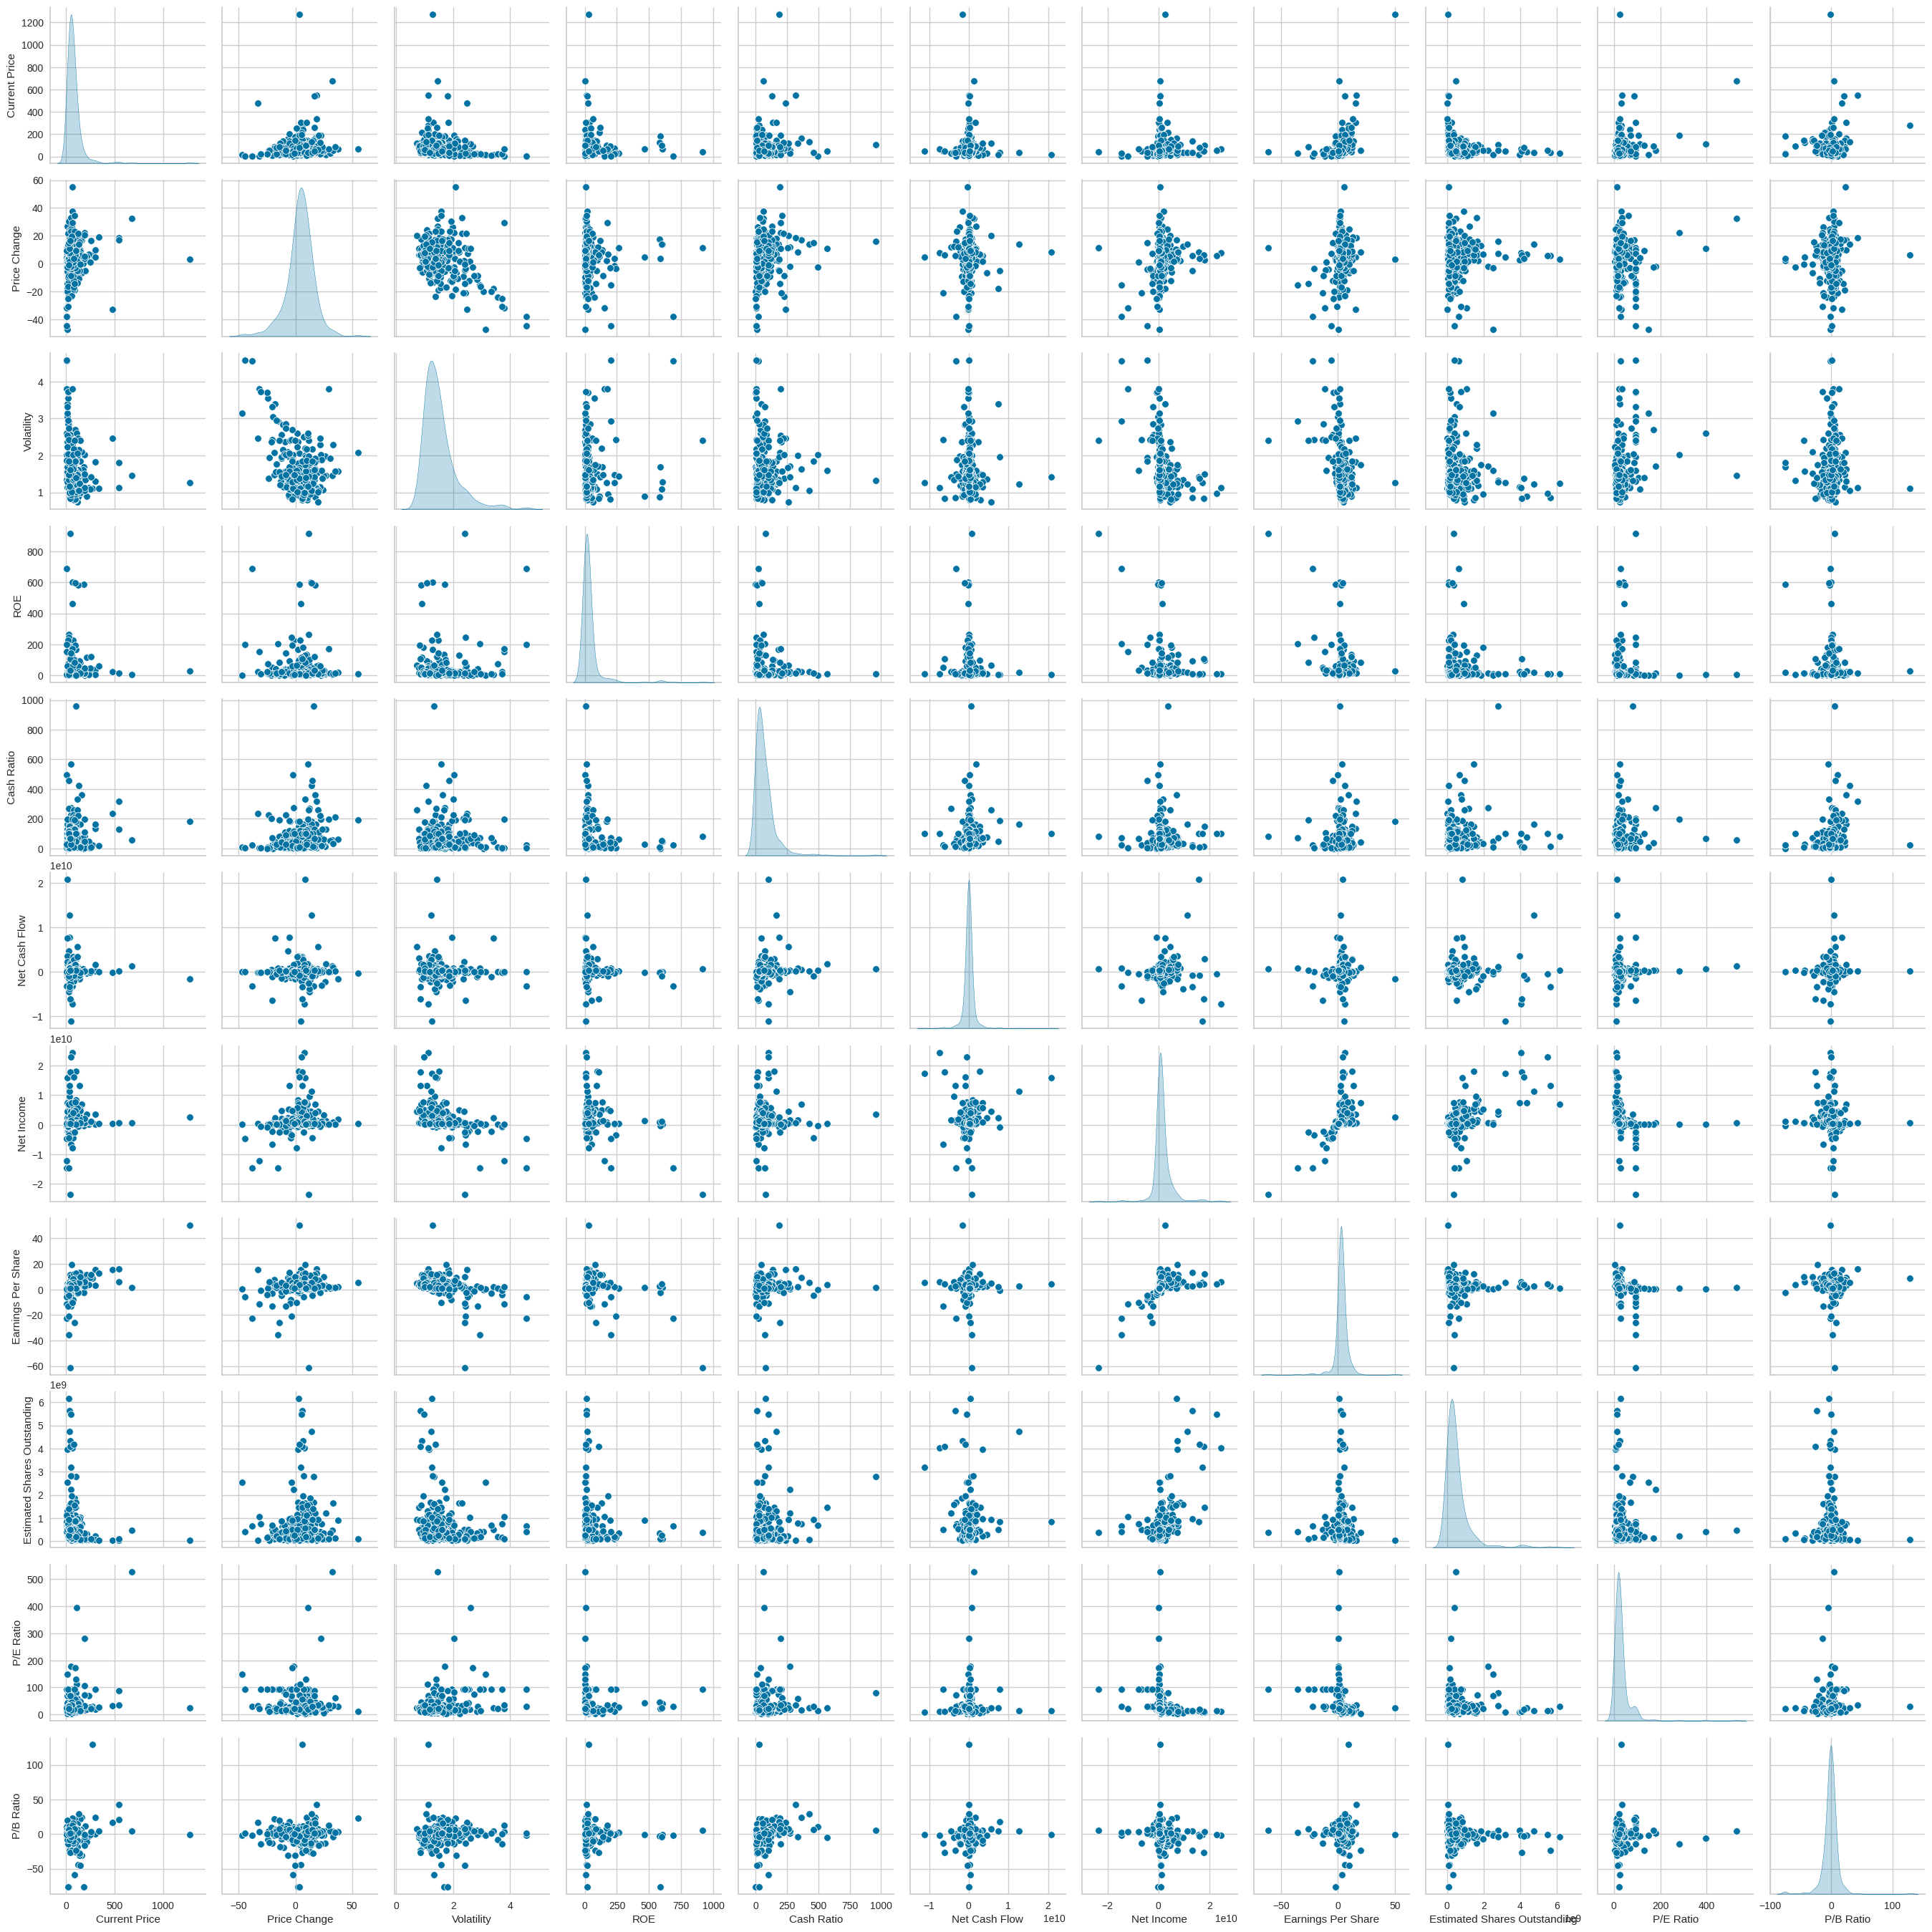

In [29]:
sns.pairplot(data=df[numeric_columns], diag_kind="kde")
plt.show()

### c. Observation of Cash Ratio and Economic Sector

***Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?***

In [30]:
'''
To calculate the average cash ratio across economic sectors:

1. Group the data by the "GICS Sector" column.
2. Calculate the average cash ratio for each sector.
3. Display the average cash ratio for each sector.
'''
average_cash_ratio_by_sector = df.groupby("GICS Sector")["Cash Ratio"].mean().sort_values(ascending=False)
print(average_cash_ratio_by_sector)


GICS Sector
Information Technology        149.82
Telecommunications Services   117.00
Health Care                   103.78
Financials                     98.59
Consumer Staples               70.95
Energy                         51.13
Real Estate                    50.11
Consumer Discretionary         49.58
Materials                      41.70
Industrials                    36.19
Utilities                      13.62
Name: Cash Ratio, dtype: float64


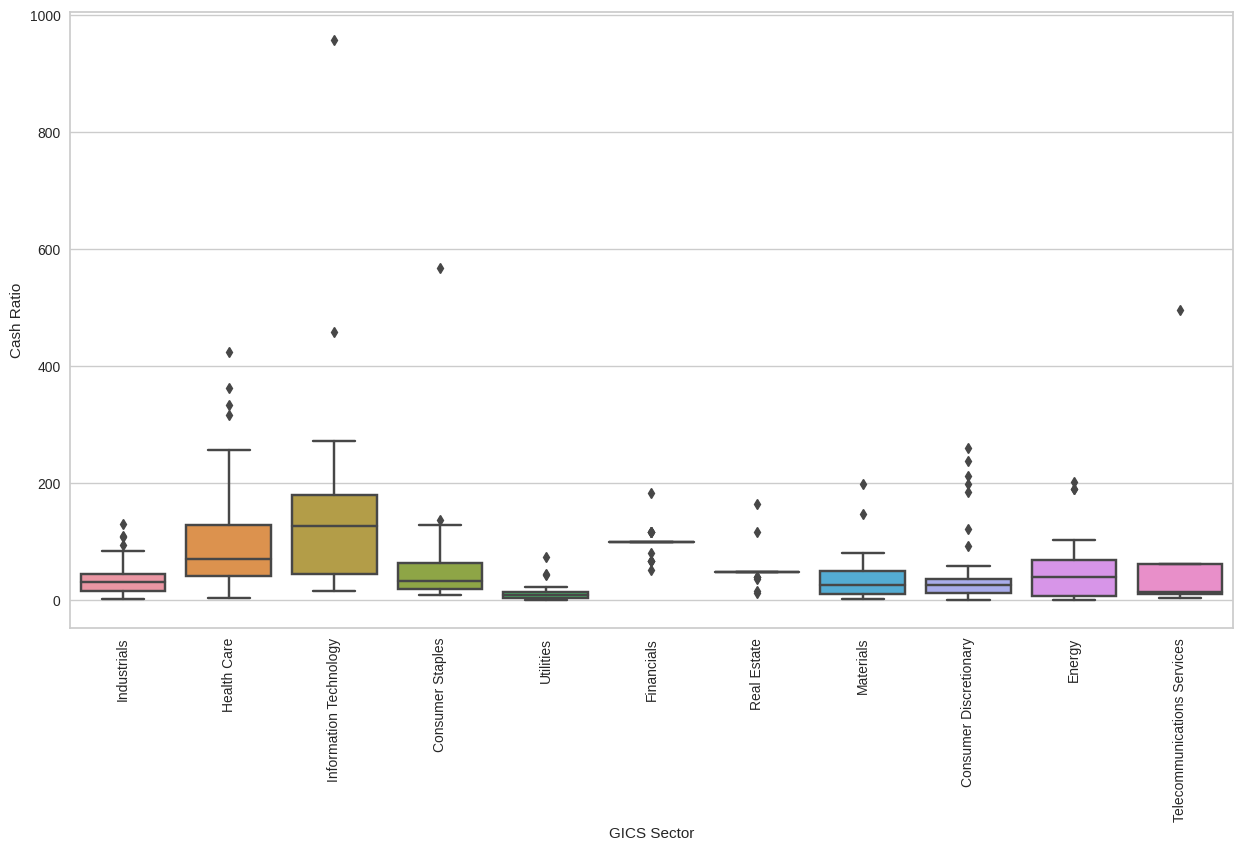

In [31]:
# Cash_Ratio Vs. GICS_Sector

plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='GICS Sector', y='Cash Ratio')
plt.xticks(rotation=90);

***Observation and Answer ***

The cash ratio indicates the ability of a company within a specific sector to cover its short-term obligations using cash and cash equivalents.

- Sectors such as Information Technology, Telecommunications Services, and Health Care have relatively higher average cash ratios.
- Companies in these sectors may tend to have a higher proportion of cash and cash equivalents compared to their current liabilities comparatively to other sectors in GICS.
- Sectors such as Utilities, Industrials, and Materials have lower average cash ratios indicating that these sectors have relatively less cash and cash equivalents in proportion to their current liabilities.

### d. Observation of P/E Ratio and Economic Sector

***P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?***

In [32]:
average_PE_ratio_by_sector = df.groupby("GICS Sector")["P/E Ratio"].mean().sort_values(ascending=False)
print(average_PE_ratio_by_sector)

GICS Sector
Energy                        72.90
Information Technology        43.78
Real Estate                   43.07
Health Care                   41.14
Consumer Discretionary        35.21
Consumer Staples              25.52
Materials                     24.59
Utilities                     18.72
Industrials                   18.26
Financials                    16.02
Telecommunications Services   12.22
Name: P/E Ratio, dtype: float64


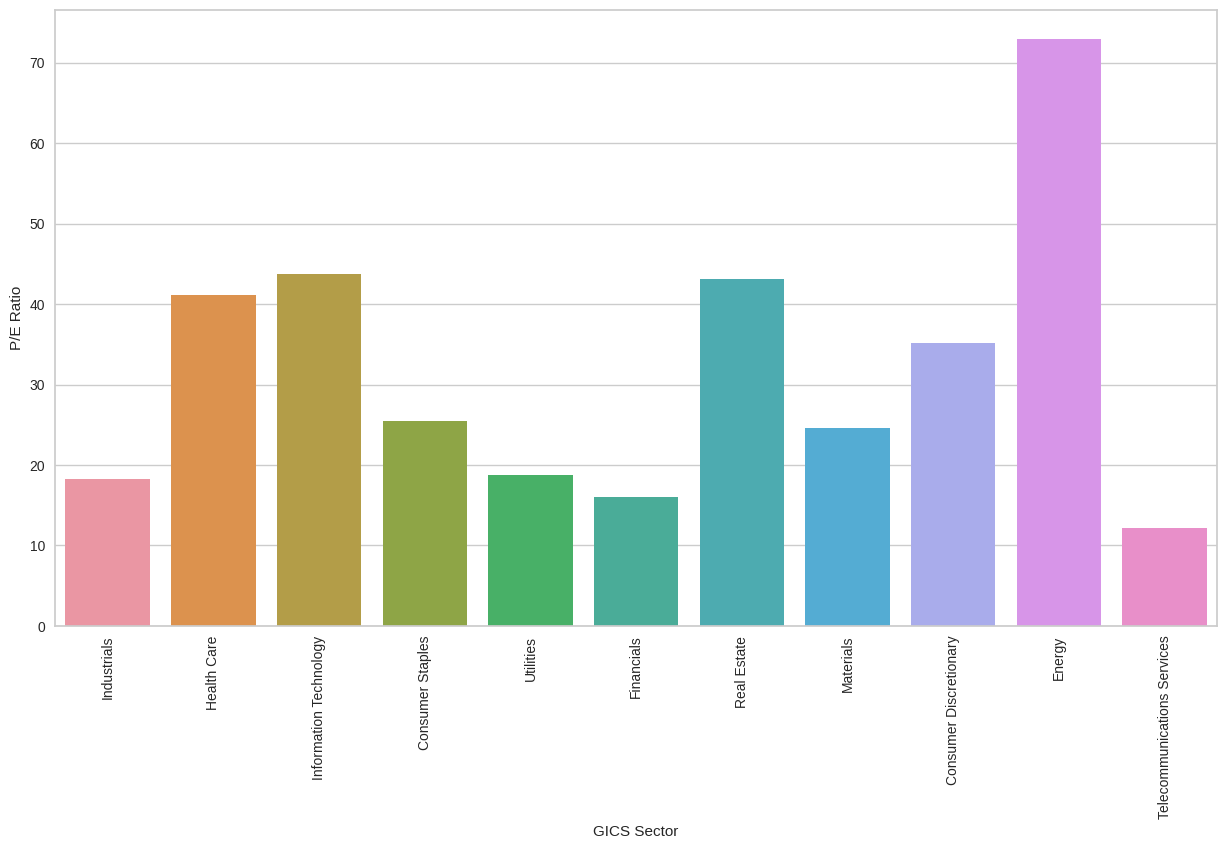

In [33]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90);

***Observation and Answer ***

- Higher P/E ratios: Sectors such as Energy, Information Technology, Real Estate, and Health Care have relatively higher average P/E ratios. This indicates that investors are willing to pay a higher price per dollar of earnings for companies in these sectors.
- Lower P/E ratios: Sectors like Telecommunications Services, Financials, Industrials and Utilities have lower average P/E ratios. It could indicate that these sectors may be perceived as having slower growth prospects or being undervalued compared to other sectors.

## 3.3 Multivariate Analysis

### **Observation of GICS Sector and GICS Sub Industry - Top 5**

In [34]:
# Lets get the top 5 GICS sectors.
# you can also use the .head()
top_5_sectors = df['GICS Sector'].value_counts().nlargest(5)

# Now lets get the top 5 GICS sub-industries for each top GICS sector
top_5_sub_industries = []
for sector in top_5_sectors.index:
    sub_industries = df[df['GICS Sector'] == sector]['GICS Sub Industry'].value_counts().nlargest(5)
    top_5_sub_industries.append(sub_industries)

In [35]:
# Display the count of sub-industries for each top GICS sector
for i, sector in enumerate(top_5_sectors.index):
    print(f"Top 5 GICS Sub-Industries in {sector}:")    #f : to format the string
    print(top_5_sub_industries[i])
    print()

Top 5 GICS Sub-Industries in Industrials:
Industrial Conglomerates    14
Airlines                     5
Industrial Machinery         5
Building Products            4
Aerospace & Defense          4
Name: GICS Sub Industry, dtype: int64

Top 5 GICS Sub-Industries in Financials:
Banks                               10
Property & Casualty Insurance        8
Diversified Financial Services       7
Consumer Finance                     5
Asset Management & Custody Banks     4
Name: GICS Sub Industry, dtype: int64

Top 5 GICS Sub-Industries in Health Care:
Health Care Equipment     11
Biotechnology              7
Pharmaceuticals            6
Managed Health Care        5
Health Care Facilities     5
Name: GICS Sub Industry, dtype: int64

Top 5 GICS Sub-Industries in Consumer Discretionary:
Internet & Direct Marketing Retail    4
Hotels, Resorts & Cruise Lines        4
Cable & Satellite                     3
Restaurants                           3
Specialty Stores                      3
Name: GICS

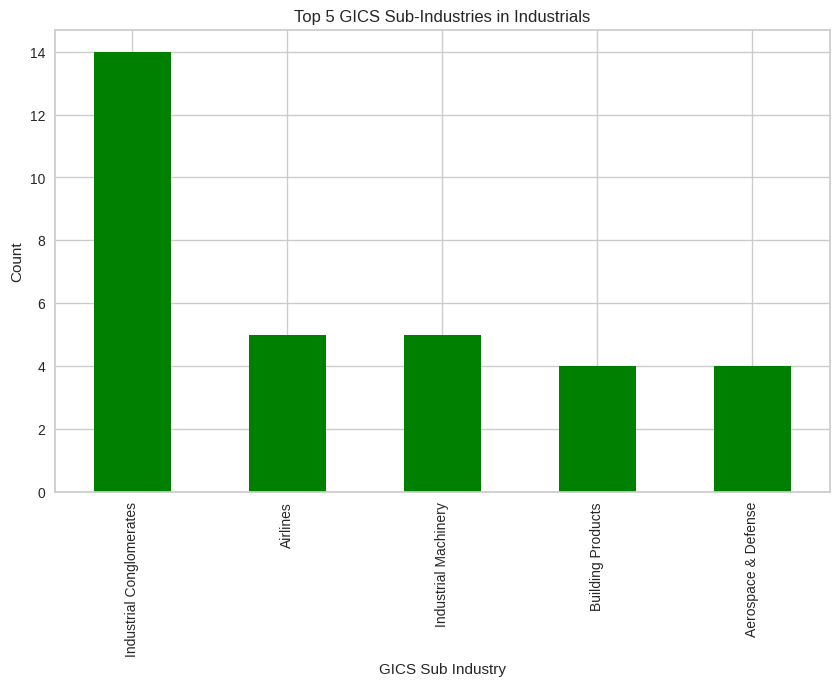

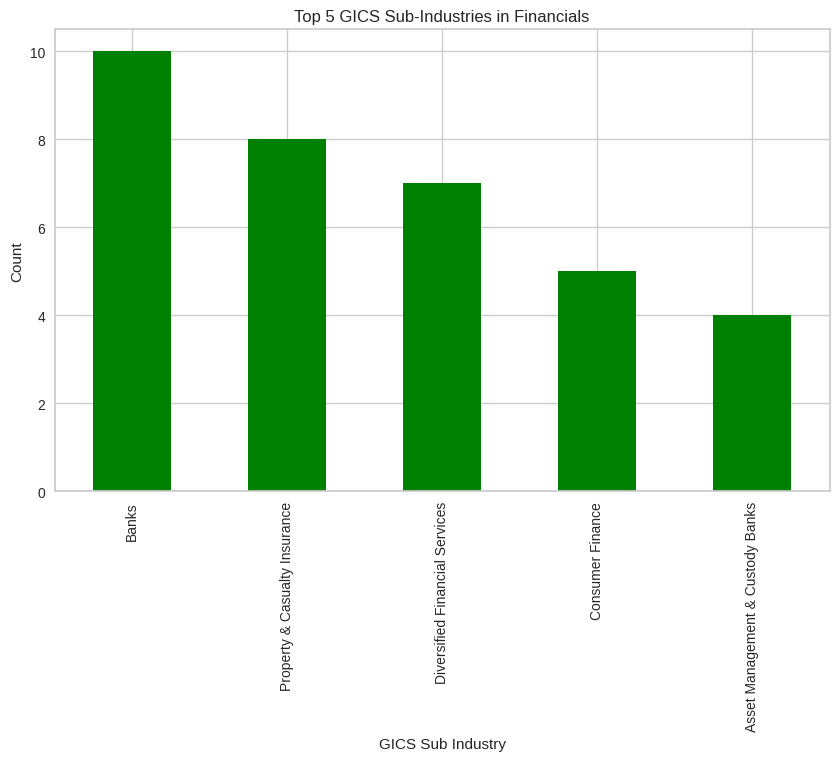

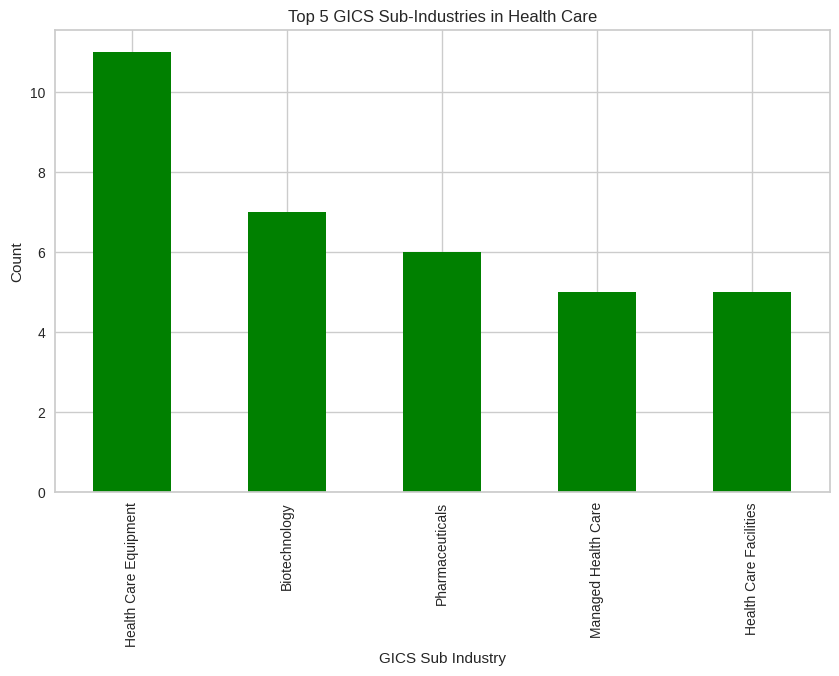

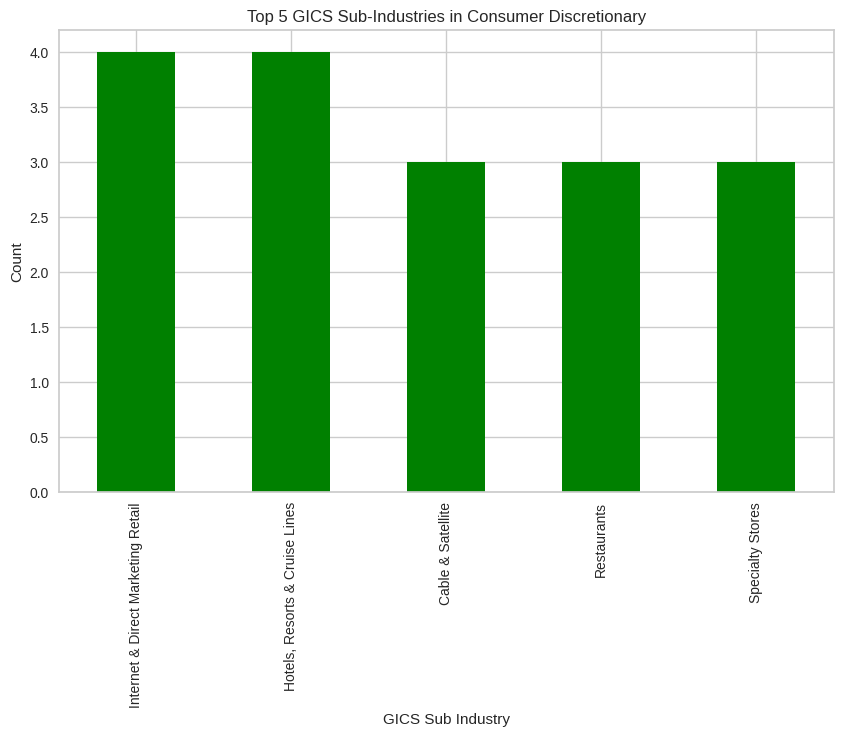

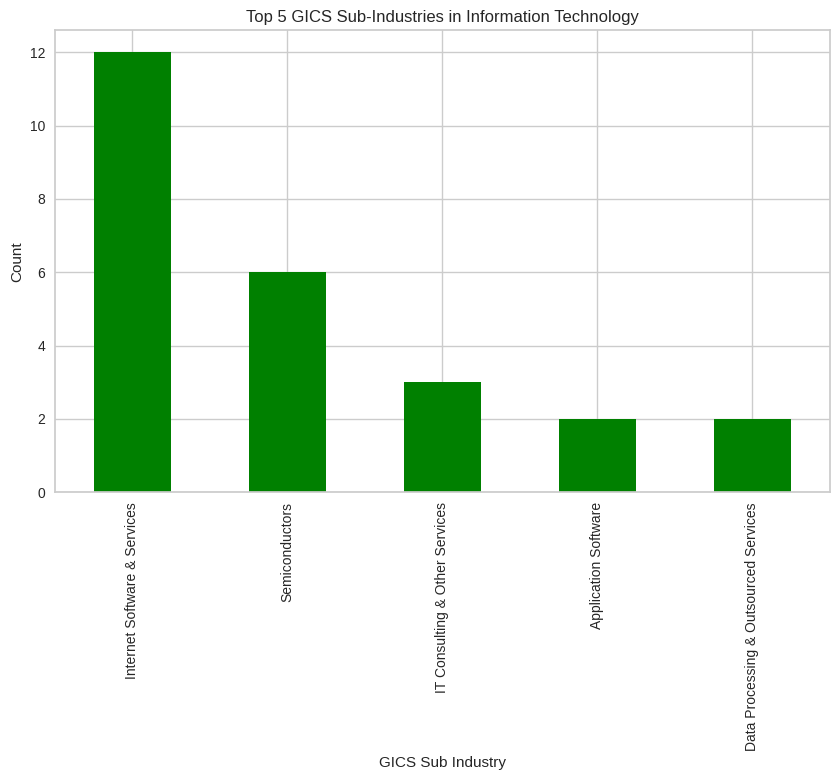

In [36]:
# Plot the top 5 GICS sub-industries for each top GICS sector

for i, sector in enumerate(top_5_sectors.index):
    plt.figure(figsize=(10, 6))
    top_5_sub_industries[i].plot(kind='bar', color='green')
    plt.xlabel('GICS Sub Industry')
    plt.ylabel('Count')
    plt.title(f'Top 5 GICS Sub-Industries in {sector}')
    plt.show()

## Step 4 : Data Preprocessing

- Data Cleaning (convert objet dtypes, dropping unnecessary columns, handling missing values, removing duplicates)
- Outlier Detection (Identifying and handling outliers)
- Data Transformation (In USL, data requires to be in a specific format or scale). Common data transformation techniques include feature scaling (e.g., standardization or normalization), logarithmic transformations, or encoding categorical variables.
- Any other preprocessing steps (if needed)

### Converting the data types

In [37]:
'''
One reason to fix the object dtype to category is to
reduce the memory usage of a DataFrame or a Series,
lead to faster processing times and the ability to
work with larger datasets that might not otherwise fit into memory.

Also beneficial for machine learning tasks

cat-columns was declared under breakdown or verify the categorical data further
'''
for i in cat_columns:
    df[i] = df[i].astype("category")


### Dropping Unnecessary Columns

In [38]:
df.drop('Ticker Symbol', axis = 1,inplace = True)

In [39]:
# vrify new dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Security                      340 non-null    category
 1   GICS Sector                   340 non-null    category
 2   GICS Sub Industry             340 non-null    category
 3   Current Price                 340 non-null    float64 
 4   Price Change                  340 non-null    float64 
 5   Volatility                    340 non-null    float64 
 6   ROE                           340 non-null    int64   
 7   Cash Ratio                    340 non-null    int64   
 8   Net Cash Flow                 340 non-null    int64   
 9   Net Income                    340 non-null    int64   
 10  Earnings Per Share            340 non-null    float64 
 11  Estimated Shares Outstanding  340 non-null    float64 
 12  P/E Ratio                     340 non-null    floa

Variable Ticker Symbol has successflly been dropped, all object dtypes has been converted to category datatype

### Outlier Detection and Treatment

In [40]:
# filter the columns of the dataframe with numeric datatypes only

numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Print the list of numerical columns
print(numeric_columns)
print('No of numerical columns are :',len(numeric_columns))

Index(['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')
No of numerical columns are : 11


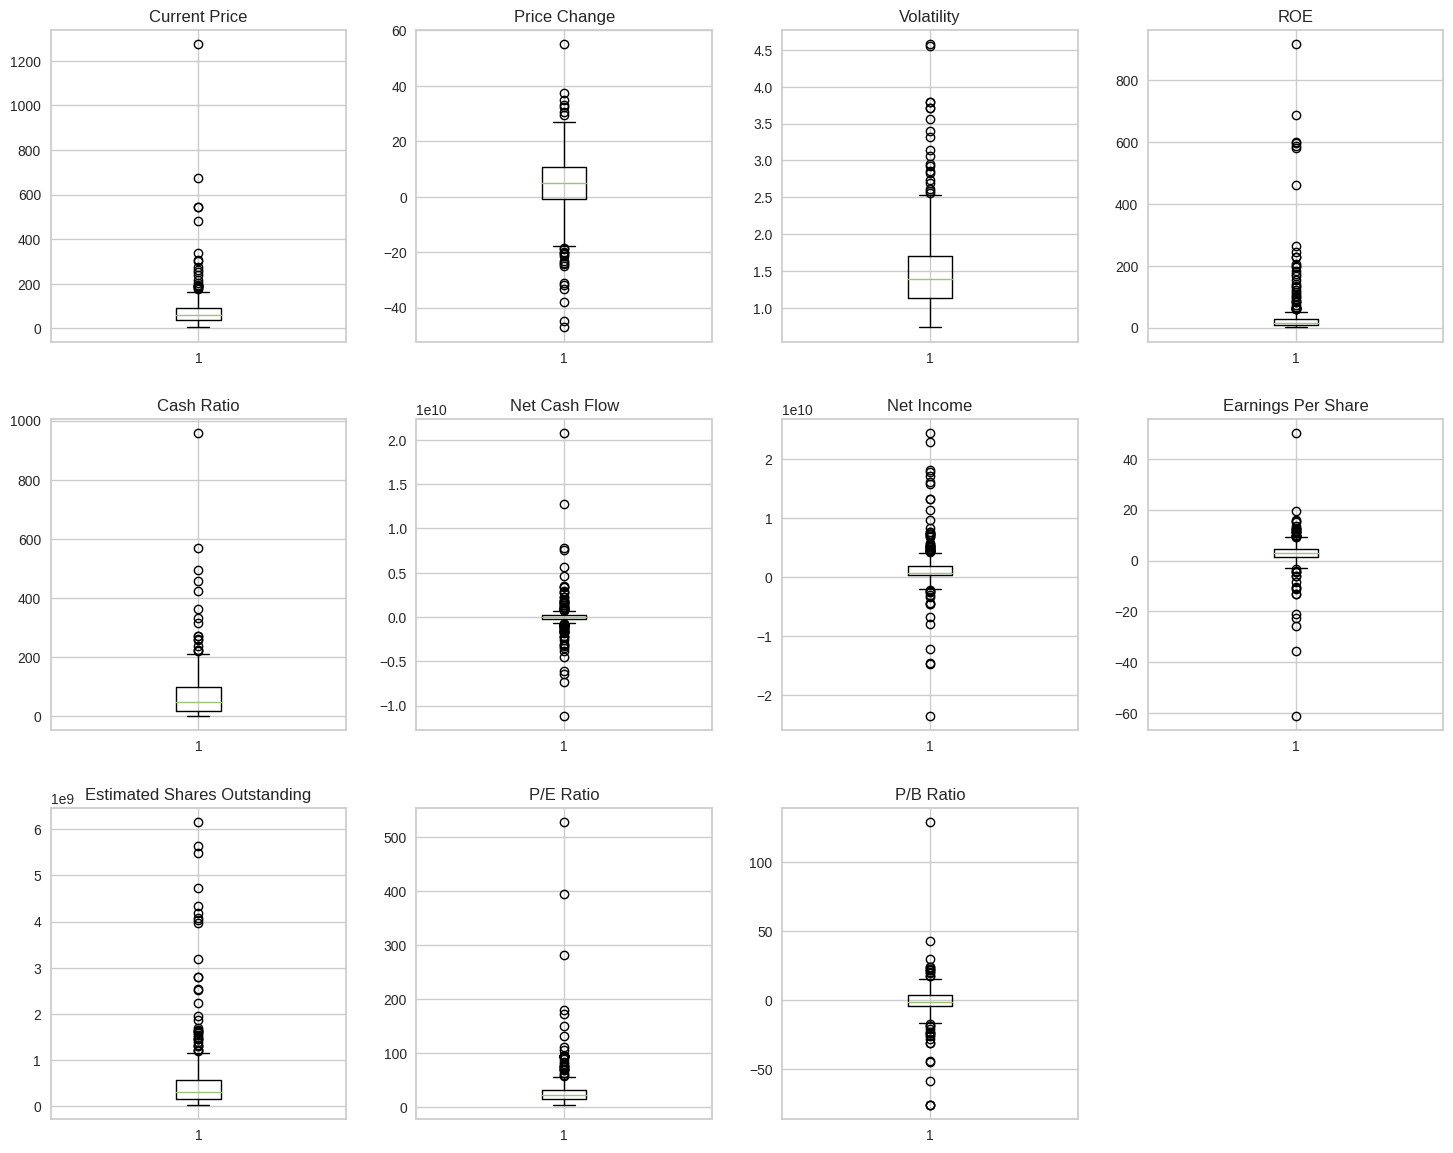

In [41]:
#Let's check for outliers in the data using boxplots
# to prevent errors in defining the number of subplots, we can use the ceiling mathematical function to determine the best number of subplots to plot

import math
n_rows = int(math.ceil(len(numeric_columns)/4))
plt.figure(figsize=(15, n_rows*4))

for i, variable in enumerate(numeric_columns):
    plt.subplot(n_rows, 4, i + 1)         # n_rows by 4 cols
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout(pad = 2)
    plt.title(variable)

plt.show()

In [42]:
# functions to treat outliers by flooring and capping

def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [43]:
# create a new data frame after treating outliers in the colums
df1 = treat_outliers_all(df, numeric_columns)

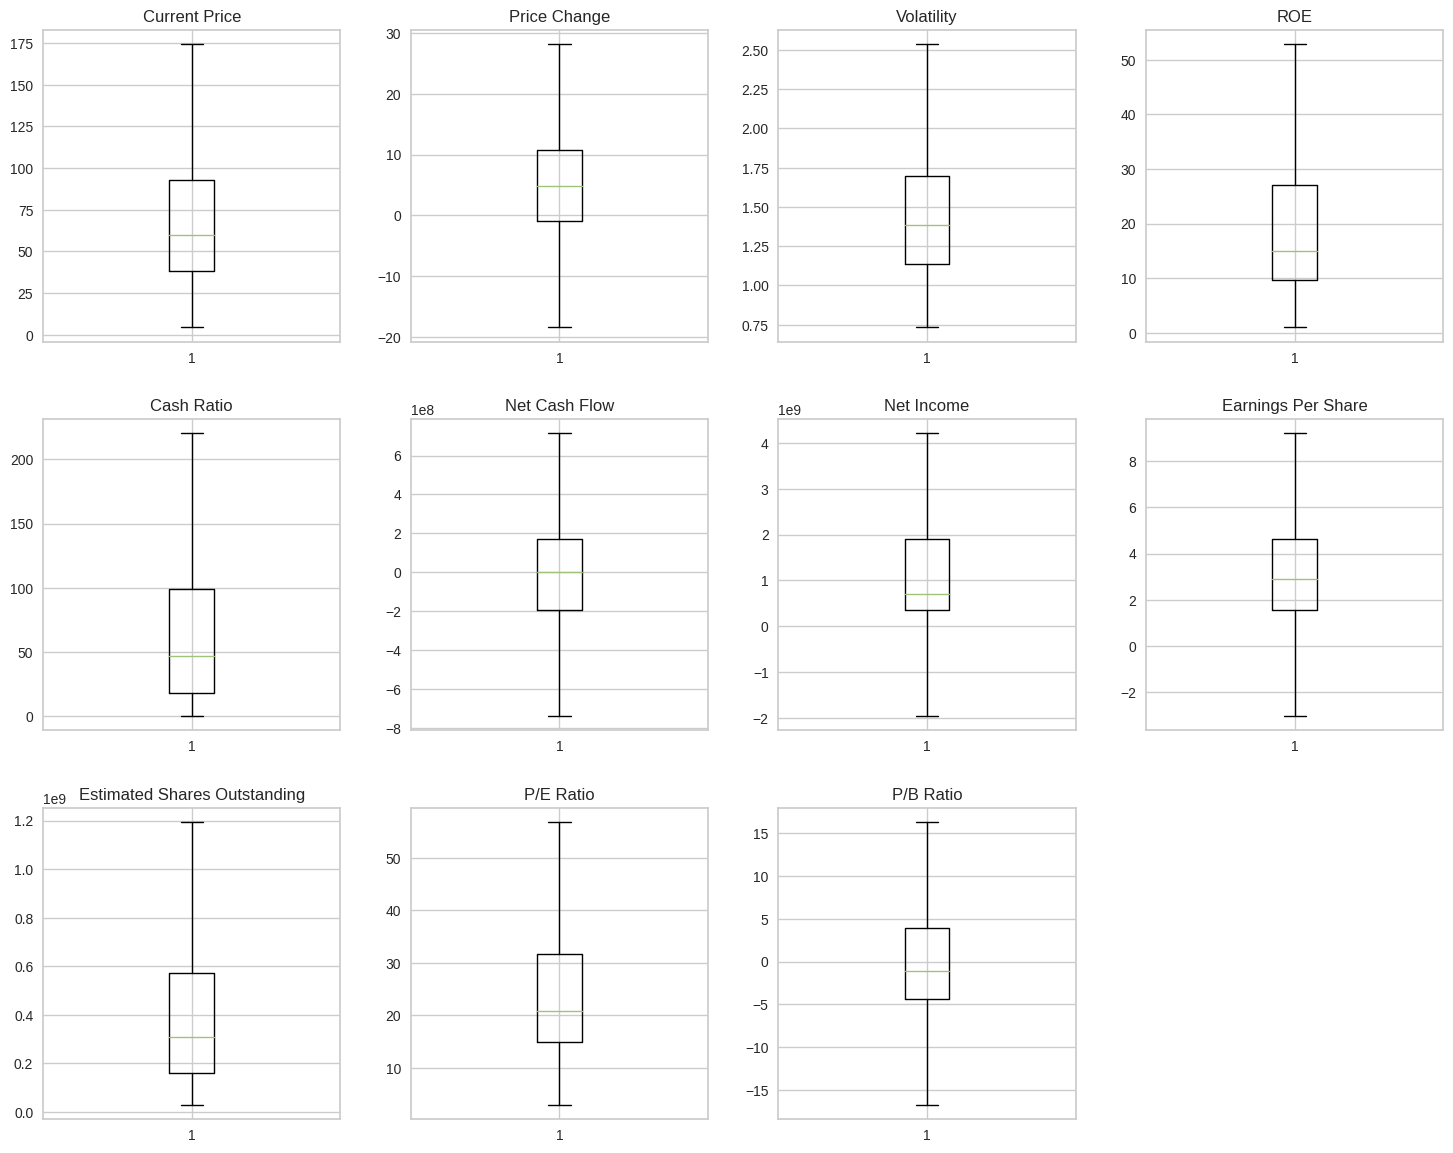

In [44]:
# verify outliers have been treated

# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=["int64", "float64"]).columns

n_rows = int(math.ceil(len(numeric_columns)/4))
plt.figure(figsize=(15, n_rows*4))

for i, variable in enumerate(numeric_columns):
    plt.subplot(n_rows, 4, i + 1)         # n_rows by 4 cols
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout(pad = 2)
    plt.title(variable)

plt.show()

Outliers have been treated.

### Scaling

Let's scale the data before we proceed with clustering.

In [45]:
scaler = StandardScaler()
subset = df1[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

In [46]:
# Creating a dataframe from the outlier treated scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [47]:
#display the first few rows of the subset_scaled DataFrame
subset_scaled_df.head()

Current Price  Price Change  Volatility   ROE  Cash Ratio  Net Cash Flow  \
0          -0.65          0.55        0.45  2.12       -0.21          -1.43   
1          -0.26          0.39        1.57  2.12        0.24           0.13   
2          -0.59          0.68       -0.46  0.03        0.07           1.72   
3           0.55          0.94       -0.27 -0.75        2.01          -0.57   
4          -0.35         -0.60        0.48 -0.43        2.70           0.76   

   Net Income  Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  \
0        1.98                2.11                          0.65      -1.49   
1        1.98                0.02                          2.12      -0.46   
2        1.98               -0.05                          2.12      -0.70   
3       -0.37               -0.64                          0.17       2.14   
4       -0.33               -0.96                          2.12       2.14   

   P/B Ratio  
0      -1.00  
1      -0.99  
2       0.11  
3       0.71  
4       0.30

## K-means Clustering

### Checking Elbow Plot

In [48]:
# make copy of the treated scaled data set
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 3.1482665386211908
Number of Clusters: 2 	Average Distortion: 2.9507542400143842
Number of Clusters: 3 	Average Distortion: 2.759761533270845
Number of Clusters: 4 	Average Distortion: 2.63153843620545
Number of Clusters: 5 	Average Distortion: 2.5345886566890665
Number of Clusters: 6 	Average Distortion: 2.4703313338147543
Number of Clusters: 7 	Average Distortion: 2.3892036349104346
Number of Clusters: 8 	Average Distortion: 2.3415378767145505
Number of Clusters: 9 	Average Distortion: 2.302109092619317
Number of Clusters: 10 	Average Distortion: 2.2377809582576833
Number of Clusters: 11 	Average Distortion: 2.204551626221652
Number of Clusters: 12 	Average Distortion: 2.183120889408329
Number of Clusters: 13 	Average Distortion: 2.136519876101571
Number of Clusters: 14 	Average Distortion: 2.1093177250276294


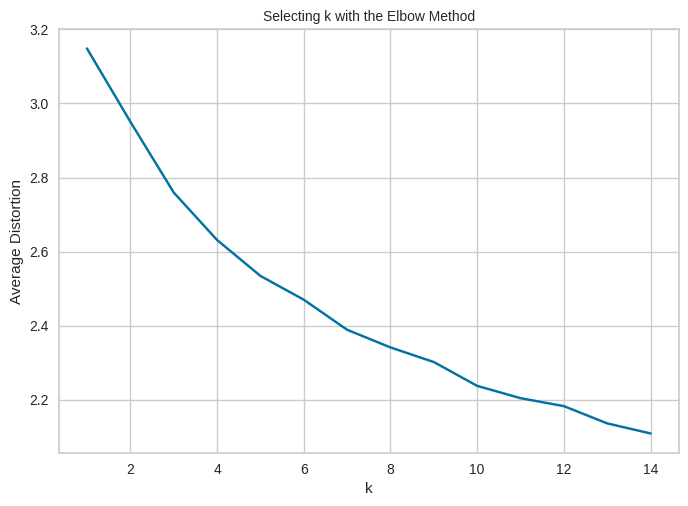

In [49]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=10)
plt.show()

**It appears that the optimal number of clusters (k) may be around 4 or 5.**

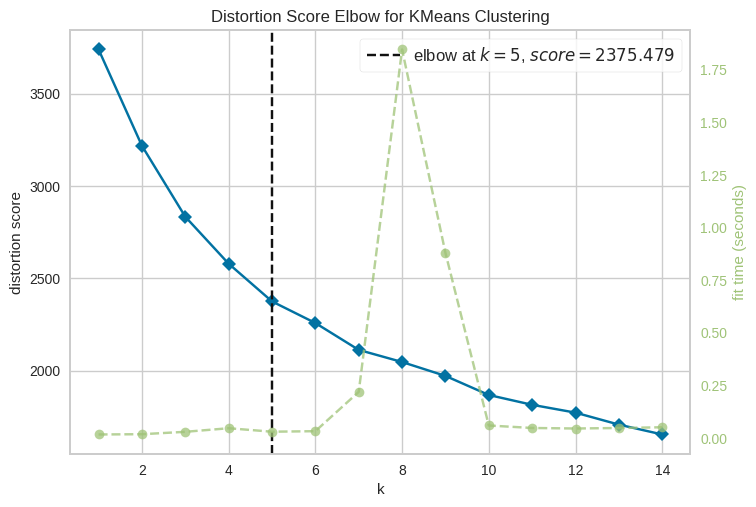

In [50]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show();  # finalize and render figure

**According to the KElbow Visualizer, the appropriate value of k = 5**

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.14040363305436732)
For n_clusters = 3, the silhouette score is 0.1818864171381463)
For n_clusters = 4, the silhouette score is 0.1653160289647168)
For n_clusters = 5, the silhouette score is 0.14591373480130365)
For n_clusters = 6, the silhouette score is 0.14123009384579105)
For n_clusters = 7, the silhouette score is 0.13718112897820767)
For n_clusters = 8, the silhouette score is 0.13111986503005277)
For n_clusters = 9, the silhouette score is 0.12839314434358204)
For n_clusters = 10, the silhouette score is 0.13936669609632177)
For n_clusters = 11, the silhouette score is 0.13539332669998302)
For n_clusters = 12, the silhouette score is 0.13543944176814168)
For n_clusters = 13, the silhouette score is 0.13808929034629017)
For n_clusters = 14, the silhouette score is 0.12467396300203645)


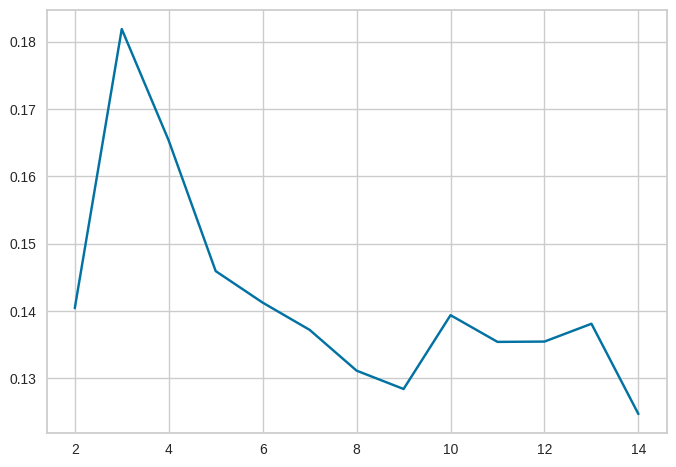

In [51]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

Higher silhouette scores indicate better-defined and well-separated clusters.

**Based on the provided silhouette scores for different numbers of clusters, the highest score is achieved when the number of clusters is 3 (silhouette score = 0.1818864171381463)**

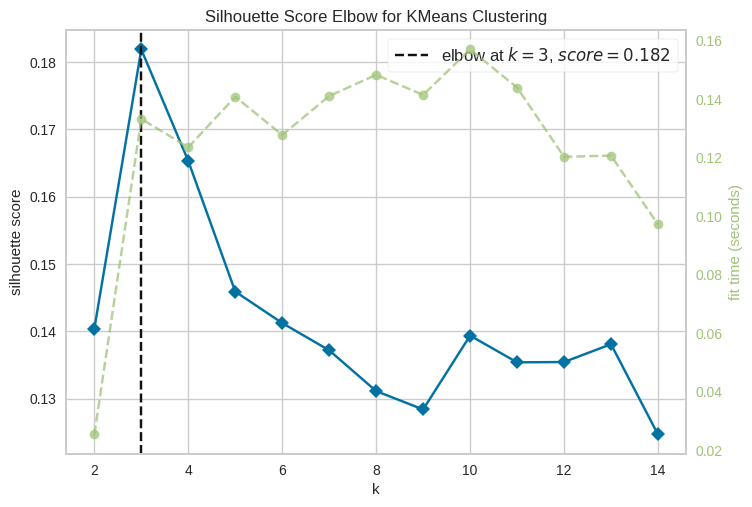

In [52]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show();  # finalize and render figure

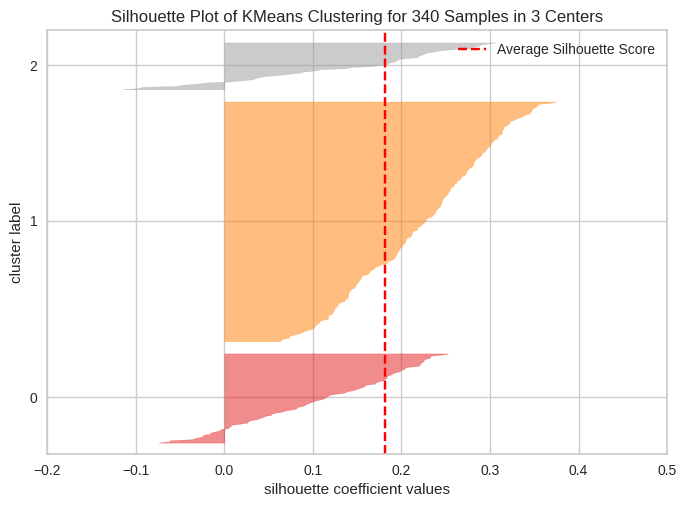

In [53]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show();

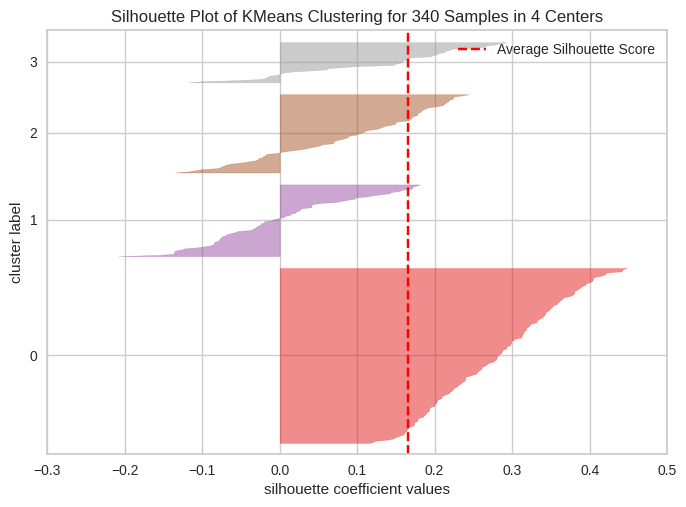

In [54]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show();

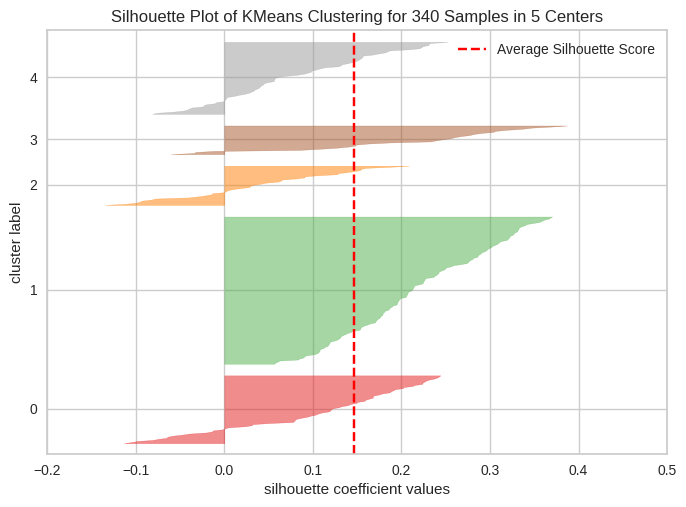

In [55]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show();

Higher average scores indicate better-defined, better cluster quality and well-separated clusters.

**Conclusion for Final Model Cluster selection (n_clusters):**
- The highest silhouette score among the tested number of clusters was achieved when the number of clusters was set to 3, indicating that the data points were relatively well-clustered with this configuration.

- Additionally, the KElbow method also suggested that the optimal number of clusters is 3 based on the elbow curve analysis.

Hence, it seems that 3 is a good value for the final model

### Creating Final Model

In [56]:
# final K-means model

%%time
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(k_means_df)

CPU times: user 63.5 ms, sys: 2.02 ms, total: 65.6 ms
Wall time: 42.1 ms


KMeans(n_clusters=3, random_state=0)

In [57]:
# creating a copy of the original data
df2 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["K_means_segments"] = kmeans.labels_
df2["K_means_segments"] = kmeans.labels_

### Cluster Profiling

In [58]:
km_cluster_profile = df2.groupby("K_means_segments").mean()

In [59]:
#count the number of observations or securities within each cluster segment.
km_cluster_profile["count_in_each_segment"] = (
    df2.groupby("K_means_segments")["Security"].count().values
)

In [60]:
#highlight the maximum value in each column of the dataFrame km_cluster_profile
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

**Observation**

Based on the highlighted maximum values in each cluster segment in conjunction with the 3 cluseters selected in the final model:

<font color = 'blue'>*Cluster Segment 0:*
- Highest mean values for Price Change, ROE, Net Cash Flow, Net Income, Earnings Per Share, and Estimated Shares Outstanding.
- Securities in this segment may have experienced significant price changes, high returns on equity, strong cash flow and net income, and high earnings per share.
- Estimated number of shares outstanding for the companies in this segment is also relatively high.

<font color = 'blue'>*Cluster Segment 1:*

- This segment has the highest value for Current Price and the highest count of securities.
- Companies in this segment may have higher current stock prices compared to other segments, indicating a potential for higher market valuation.
- As the count of securities in this segment is also the highest, it suggest that a larger number of companies fall into this category.

<font color = 'blue'>*Cluster Segment 2:*

- This segment has the highest values for Volatility, Cash Ratio, P/E Ratio, and P/B Ratio.
- Companies in this segment may have higher volatility in their stock prices, indicating higher risk or price fluctuations.
- The compnies also have high cash ratios, which signify their ability to cover short-term obligations using cash and cash equivalents.
- The P/E Ratio and P/B Ratio in this segment are also relatively high, indicating potentially higher valuations compared to other segments.



In [61]:
# simple print and count the companies in each cluster

cluster_counts = []
for cl in df2["K_means_segments"].unique():
    companies = df2[df2["K_means_segments"] == cl]["Security"].unique()
    count = len(companies)
    cluster_counts.append([cl, count, ", ".join(companies)])

print(tabulate(cluster_counts, headers=["Cluster", "Count", "Companies(Security)"]))


  Cluster    Count  Companies(Security)
---------  -------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [62]:
# to print, segregate by GICS sector, and count the companies in each cluster
from tabulate import tabulate

cluster_counts = []
for cl in df2["K_means_segments"].unique():
    cluster_data = []
    for sector in df2["GICS Sector"].unique():
        companies = df2[(df2["K_means_segments"] == cl) & (df2["GICS Sector"] == sector)]["Security"].unique()
        count = len(companies)
        cluster_data.append((sector, count, ", ".join(companies)))
    cluster_counts.append([cl, cluster_data])

headers = ["Cluster", "Sector", "Count", "Companies(Security)"]
table_data = []
for cluster in cluster_counts:
    cl = cluster[0]
    data = cluster[1]
    for entry in data:
        sector, count, companies = entry
        table_data.append([cl, sector, count, companies])

print(tabulate(table_data, headers=headers))


  Cluster  Sector                         Count  Companies(Security)
---------  ---------------------------  -------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
        0  Industrials                       16  American Airlines Group, Boeing Company, Caterpillar Inc., CSX Corp., Delta Air Lines, Danaher Corp., General Dynamics, Honeywell Int'l Inc., Illinois Tool Works, Lockheed Martin C

In [63]:
# to simply print the GICS sector in a given segment (without the company names)
df2.groupby(["K_means_segments", "GICS Sector"])['Security'].count()

K_means_segments  GICS Sector                
0                 Consumer Discretionary          4
                  Consumer Staples                8
                  Energy                          5
                  Financials                     18
                  Health Care                    11
                  Industrials                    16
                  Information Technology         12
                  Materials                       2
                  Real Estate                     0
                  Telecommunications Services     3
                  Utilities                       3
1                 Consumer Discretionary         34
                  Consumer Staples               11
                  Energy                          1
                  Financials                     30
                  Health Care                    27
                  Industrials                    35
                  Information Technology         14
                  

### Boxplot of scaled numerical variables for each cluster

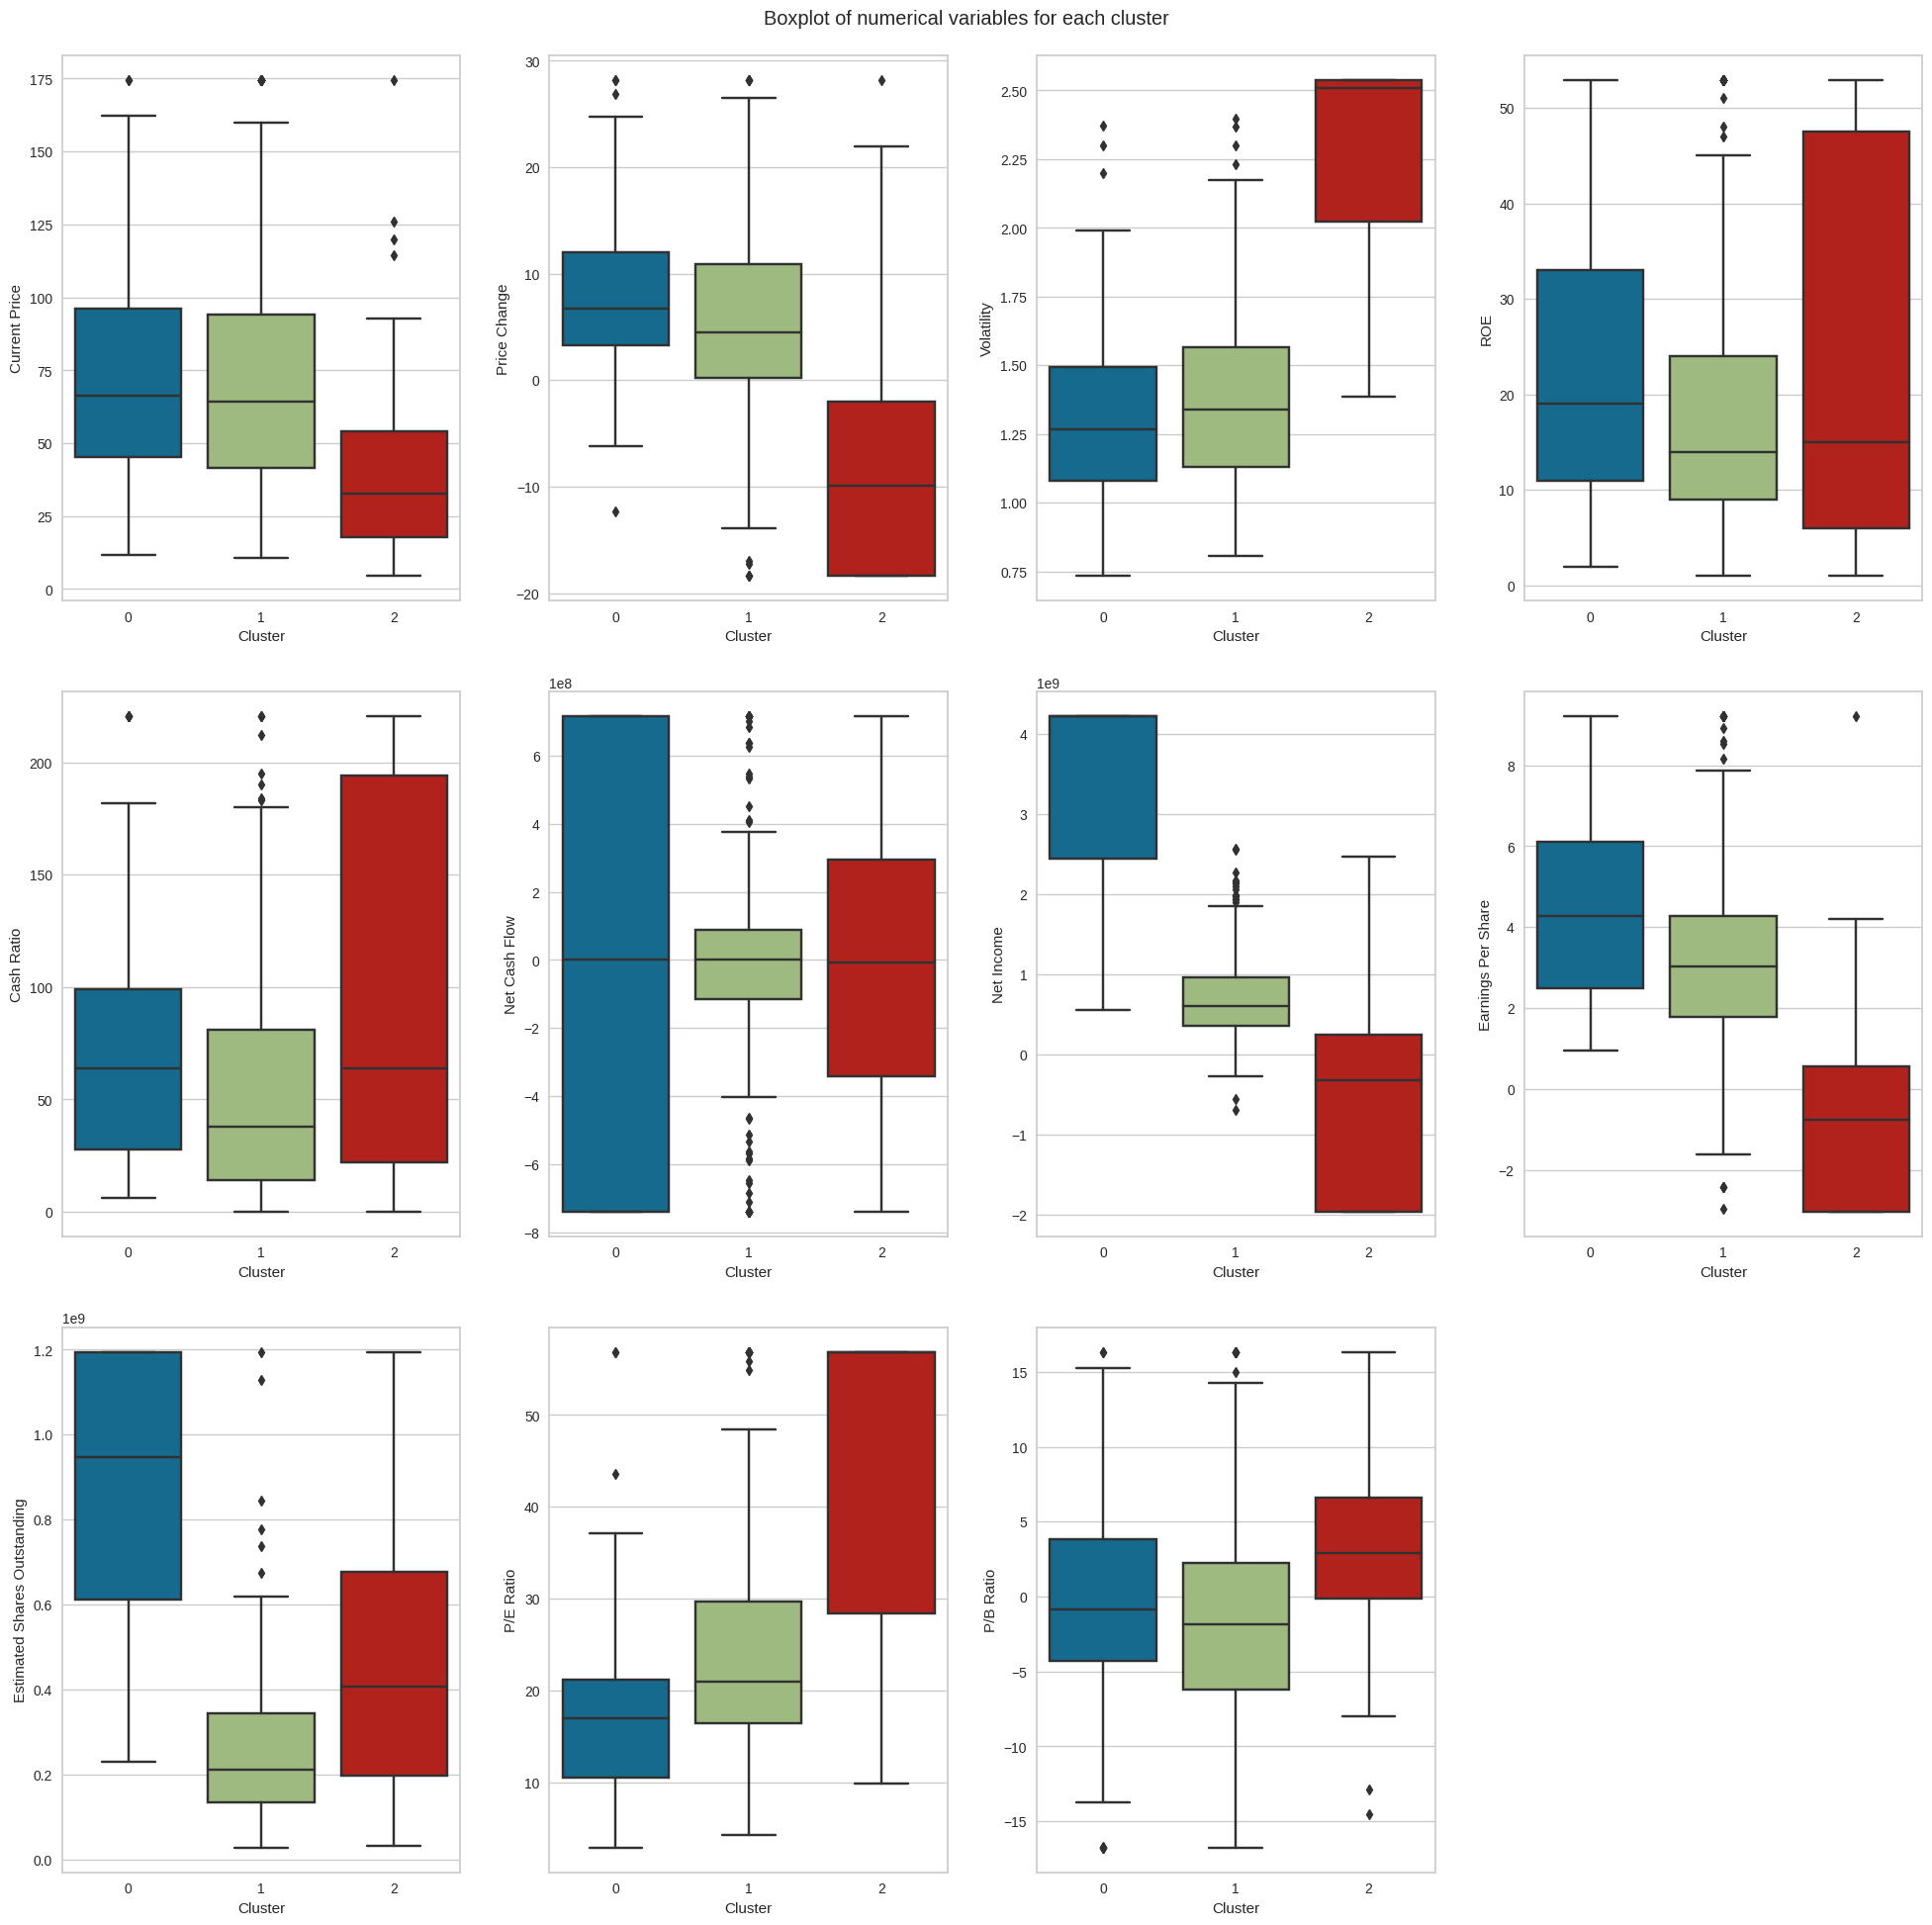

In [64]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# Selecting numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# Determine the number of rows and columns for the subplots
num_plots = len(numeric_columns)
num_rows = num_plots // 4 + (num_plots % 4 > 0)
num_cols = min(num_plots, 4)

for i, variable in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=df2, x="K_means_segments", y=variable)
    plt.xlabel("Cluster")
    plt.ylabel(variable)

plt.tight_layout(pad=2.0)
plt.show()


###<font color = 'blue'> Insights

From the cluster grouping tabulation, we can deduce the following insights:

**Cluster 0:**
- Notable for its presence of Financials companies
- This cluster has 82 companies classified by a diverse mix of sectors.
- The majority of companies in this cluster are from the Financials sector (18 companies), followed by Industrials (16 companies) and Information Technology (11 companies).

**Cluster 1:**
- Notable for a diverse mrket sector
- This cluster has 215 companies, making it the largest cluster.
- The presence of a large number of companies from various sectors suggests that Cluster 1 exhibits varying business characteristics.
- It has a more balanced distribution across sectors, with significant representation from Industrials (35 companies), Consumer Discretionary (34) and Financials (30 companies).  Health Care, Real Estate, and Utilities sectors also have a considerable number of companies in this cluster.


**Cluster 2:**
- Is primarily composed of Energy companies
- This cluster has the fewest companies, with only 43.
- The distinguishing feature of this cluster is the dominance of the Energy sector, with 24 companies.
- Other sectors have a relatively lower representation, with only a few companies from Information Technology, Materials, and Health Care.


## Hierarchical Clustering

### Computing Cophenetic Correlation
(measures the correlation between the pairwise distances of the original data points and the pairwise distances of the clustered data points)

In [65]:
# make a copy of the scaled data frame (outlier treated scaled dataframe)
hc_df = subset_scaled_df.copy()

In [66]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.6932108674136777.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6147798823663769.
Cophenetic correlation for Euclidean distance and average linkage is 0.7325610568988987.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6496438783746494.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7214024727237498.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.36805931247944257.
Cophenetic correlation for Chebyshev distance and average linkage is 0.7011385715318806.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.5032471223561586.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6176064847170998.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.3854304450443971.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6415876007925729.
Cophenetic c

In [67]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

****************************************************************************************************
Highest cophenetic correlation is 0.7325610568988987, which is obtained with Euclidean distance and average linkage.


**Observation**

Based on these coefficients:
 - clustering methods using ***Euclidean distance and average linkage is the highest***
 - Cityblock distance and average linkage also exhibit relatively higher Cophenetic correlation coefficients.

 This suggests that these methods preserve the original distances in the data more effectively compared to other combinations of distance metrics and linkage methods.

**Let's explore different linkage methods with Euclidean distance only.**

In [68]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.6932108674136777.
Cophenetic correlation for complete linkage is 0.6147798823663769.
Cophenetic correlation for average linkage is 0.7325610568988987.
Cophenetic correlation for centroid linkage is 0.7294329307928586.
Cophenetic correlation for ward linkage is 0.5753306117577637.
Cophenetic correlation for weighted linkage is 0.6496438783746494.


In [69]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7325610568988987, which is obtained with average linkage.


**Observation**

Based on these results, we can observe that average linkage and centroid linkage methods have relatively higher Cophenetic correlation coefficients

**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

CPU times: user 5.08 s, sys: 60.5 ms, total: 5.14 s
Wall time: 5.21 s


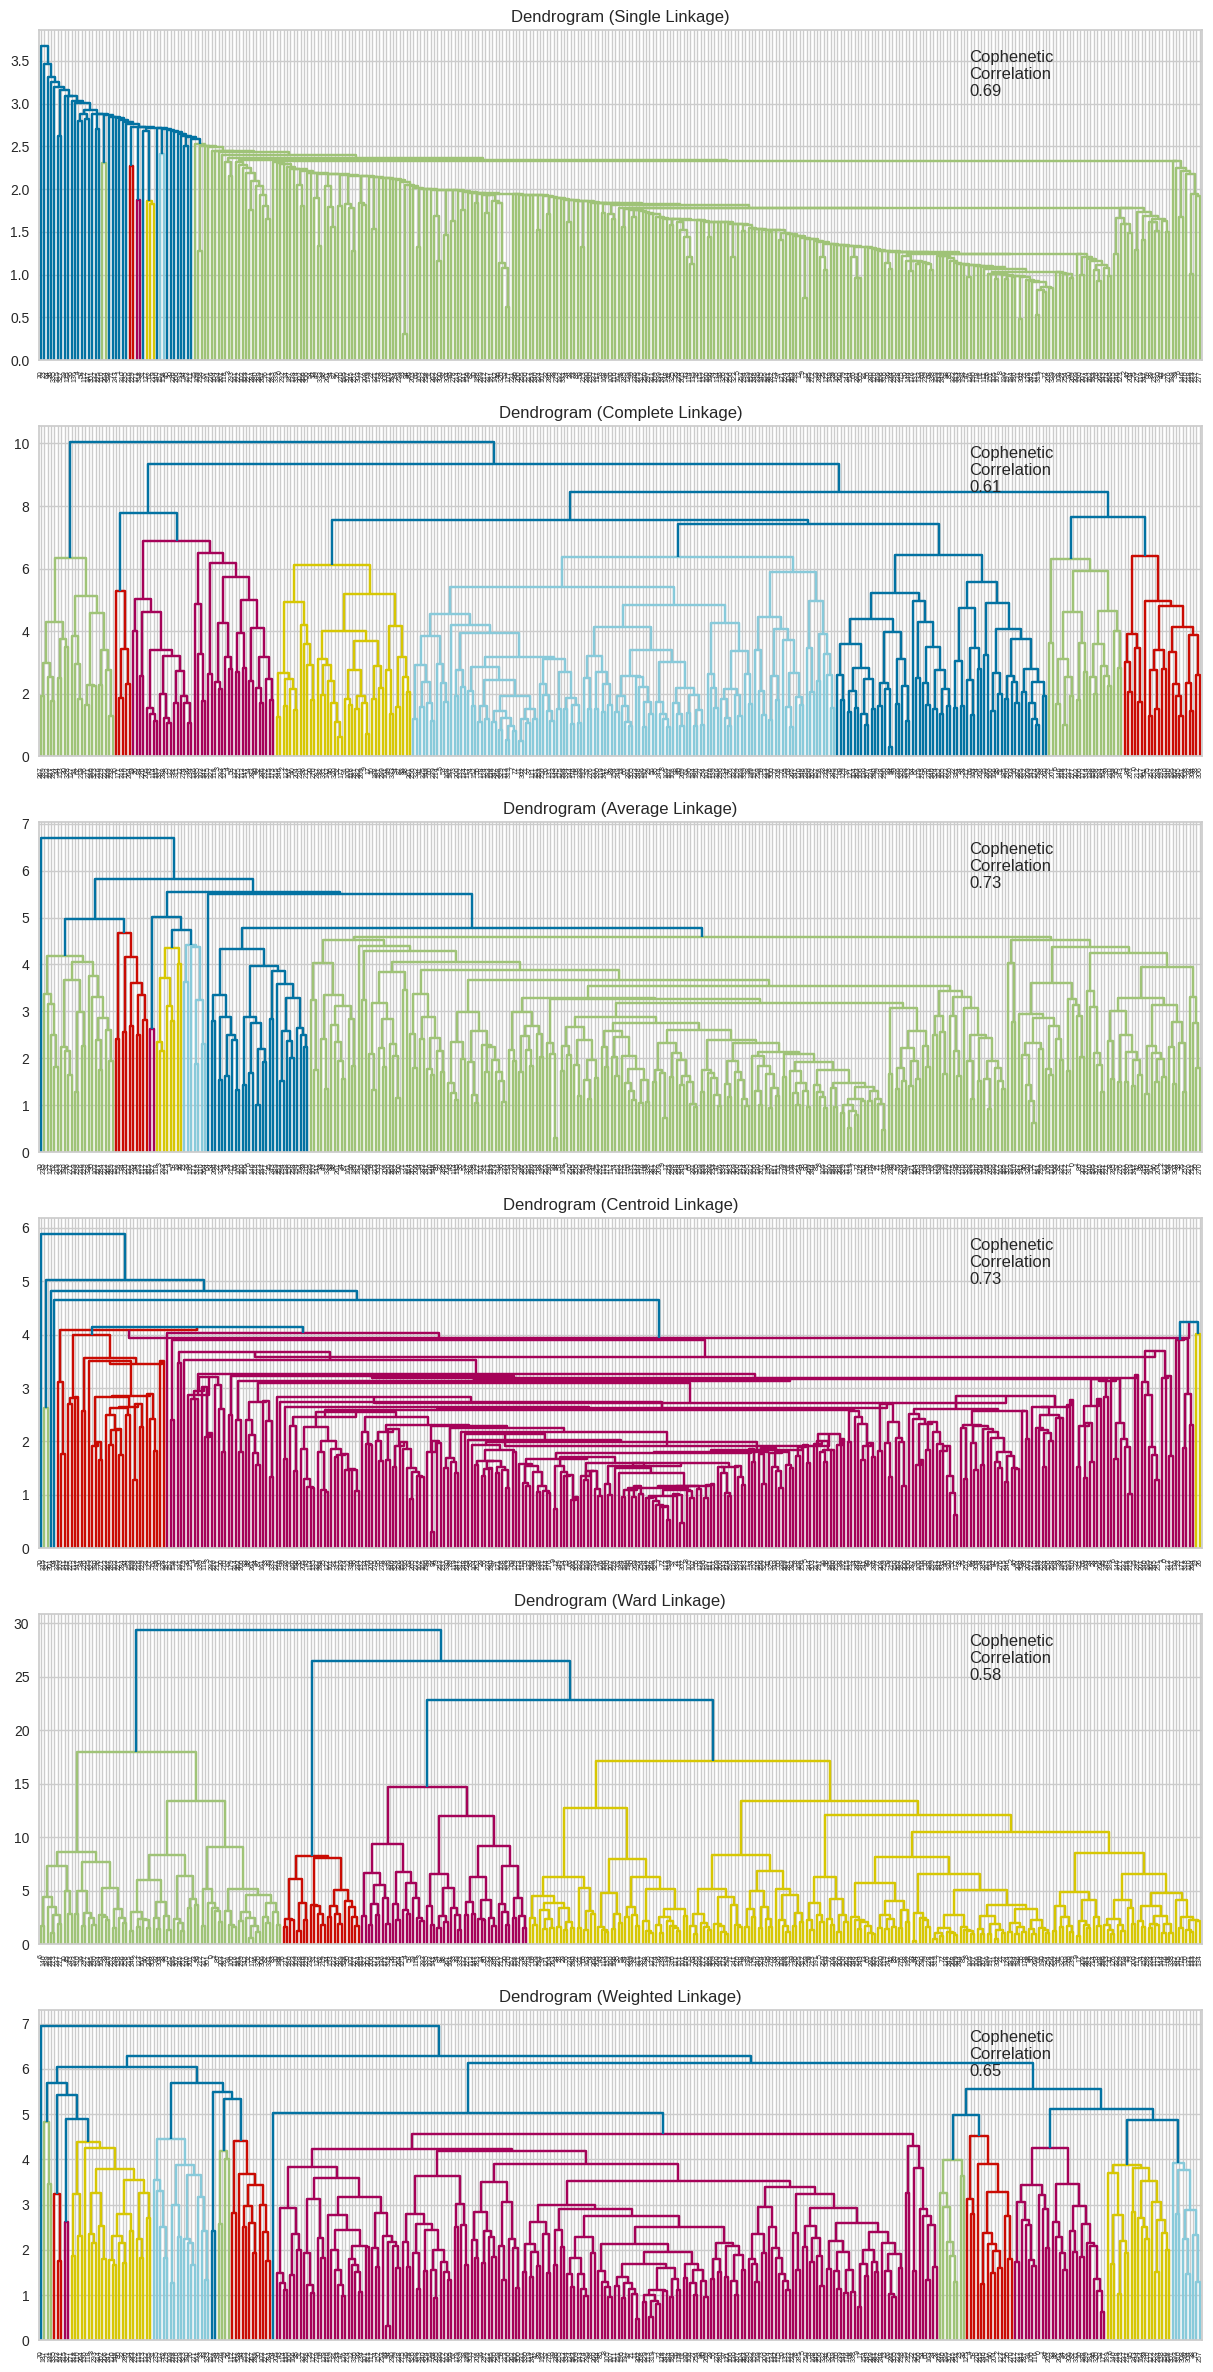

In [70]:
%%time
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []  #save the results of the cophenetic correlation calculation

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
    compare.append([method, coph_corr])

In [71]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

Linkage  Cophenetic Coefficient
4      ward                    0.58
1  complete                    0.61
5  weighted                    0.65
0    single                    0.69
3  centroid                    0.73
2   average                    0.73

**Known Interpretation**

- Both Centroid linkage and Average linkage exhibit the highest cophenetic coefficients of 0.73, suggesting that these methods better preserve the original pairwise distances compared to the other methods.
- We will move ahead with Average Linkage

**Unknown Intepretation**
- One of the problems with hierarchical clustering is that there is no objective way to say how many clusters there are (There is no commonly agreed-upon way to decide where to cut the dendogram)
- Hence, the appropriate number of clusters from the dendrogram will be set to 4, at a height threshold of approx 5.2(y-axis)

Student Note :
*In the dendogram, the x-axis contains all the samples in the dataset and y-axis represents the  distance between these samples*


### Creating model using sklearn

In [72]:
%%time
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

CPU times: user 8.42 ms, sys: 0 ns, total: 8.42 ms
Wall time: 40.1 ms


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [73]:
# creating a copy of the original data
df3 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_Clusters"] = HCmodel.labels_
df3["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [74]:
#calculates the mean value for each group
hc_cluster_profile = df3.groupby("HC_Clusters").mean()

In [75]:
hc_cluster_profile["count_in_each_segments"] = (
    df3.groupby("HC_Clusters")["Security"].count().values
)

In [76]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

Based on the highlighted mean maximum values in each cluster segment in conjunction with the 4 cluseters selected in the final HC model:

<font color = 'blue'>*Cluster 0:*
- This cluster has moderate current price, relatively low volatility, and a positive price change.
- The return on equity (ROE) is reasonable at 20.138746, indicating decent profitability.
- It has a relatively lower cash ratio of 55.000000, suggesting lower liquidity.
- Despite having experienced temporary challenges with cash flow management (negative net cash flow), it has the highest net income of 1,429,326,175.687285 among all clusters. The negative cash flow might be attributed to factors such as investments, expansion efforts, or other non-operating activities.
- The earnings per share (EPS) is moderate at 3.571903, and the estimated shares outstanding are relatively high at 437,154,378.457835 (The higher the number of outstanding shares, the more diluted the earnings per share can be. EPS is a key financial metric for investors and analyst, when evaluating a company's financial performance and potential for future growth).
- THe P/B ratio is negative (lowest of the clusters) at -2.134347, which might indicate undervaluation or other financial considerations.
- Cluster 0 has the highest count in each segment, with 291 data points.

<font color = 'blue'>*Cluster 1:*
- This cluster has the highest price change of 17.649246 among all clusters, indicating significant fluctuations in the price of securities over a gvien period.
- The net cash flow is the highest among all clusters at 217,965,698.529412, indicating strong cash generation.
- The net income is 922,378,654.411765, suggesting healthy profitability.

<font color = 'blue'>*Cluster 2:*
- This cluster has the lowest current price among all clusters, indicating potentially undervalued stock.
- This cluster also experienced a negative price change, suggesting a decline in value.
- The volatility is relatively high at 2.384953, indicating significant price fluctuations.
- The ROE is the highest among all clusters at 24.677419, indicating strong profitability. The combination of highest ROE and highest P/E ratio implies that investors perceive these companies as having strong profitability and the potential for future growth.
- The negative net income of -803,106,294.354839 suggests that the companies within Cluster 2 have experienced a net loss during the specified period.
- Despite the negative net income, Cluster 2 companies has a positive net cash flow of 34,989,008.064516. This implies that the companies were able to generate positive cash inflows.
- The estimated shares outstanding for Cluster 2 is the highest among all clusters at 472,889,826.396855. This implies that the companies in this cluster have a significant number of shares available in the market.
- The P/E ratio is the highest among all clusters at 47.957287. This suggests that investors have higher expectations for future earnings growth or are willing to pay a premium for the company's stock.
- The combination of a high estimated shares outstanding and a high P/E ratio might indicate that investors have confidence in the growth prospects of Cluster 2 companies despite the negative net income.


<font color = 'blue'>*Cluster 3:*
- This cluster has the highest mean current price indicating a potentially premium valuation for the company's stock.
- The mean price change of -18.391948 suggests that there is a decline in the stock price from a previous period.
- The mean volatility of 2.474002 is the highest among all clusters, indicating significant price fluctuations for the company's stock. (high volatility can present both opportunities and risks)
- The mean ROE of 22.000000 suggests a decent level of profitability.
- The mean cash ratio of 220.500000 is the highest among all clusters, indicating a strong liquid position for the companies. This implies that the companies in this cluster has a significant amount of cash or cash equivalents.
- The EPS of 9.213750 is the highest among all clusters. It indicates the profitability per outstanding share of the company.
- The P/B ratio of 16.320749 is the highest among all clusters. A higher P/B ratio suggests a relatively higher valuation based on the company's net assets.
- This segment has high negative net cash flow, but the net income is positive. A reason for this could be F&B companies often require investments in equipment, facilities, or inventory, which involve significant cash outflows. If the company has made substantial capital expenditures during the period, it can lead to negative cash flow despite positive net income.
- This cluster contains only 1 securities company (ie. Chipotle Mexican Grill)

In [77]:
# simple print and count the companies in each cluster
from tabulate import tabulate

cluster_counts = []
for cl in df3["HC_Clusters"].unique():
    companies = df3[df3["HC_Clusters"] == cl]["Security"].unique()
    count = len(companies)
    cluster_counts.append([cl, count, ", ".join(companies)])

print(tabulate(cluster_counts, headers=["Cluster", "Count", "Companies"]))


  Cluster    Count  Companies
---------  -------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [78]:
# to print, segregate by GICS sector, and count the companies in each cluster
from tabulate import tabulate

cluster_counts = []
for cl in df3["HC_Clusters"].unique():
    cluster_data = []
    for sector in df3["GICS Sector"].unique():
        companies = df3[(df3["HC_Clusters"] == cl) & (df3["GICS Sector"] == sector)]["Security"].unique()
        count = len(companies)
        cluster_data.append((sector, count, ", ".join(companies)))
    cluster_counts.append([cl, cluster_data])

headers = ["Cluster", "Sector", "Count", "Companies"]
table_data = []
for cluster in cluster_counts:
    cl = cluster[0]
    data = cluster[1]
    for entry in data:
        sector, count, companies = entry
        table_data.append([cl, sector, count, companies])

print(tabulate(table_data, headers=headers))


  Cluster  Sector                         Count  Companies
---------  ---------------------------  -------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [79]:
# to simply print the GICS sector in a given segment (without the company names)
df3.groupby(["HC_Clusters", "GICS Sector"])['Security'].count()

HC_Clusters  GICS Sector                
0            Consumer Discretionary         36
             Consumer Staples               19
             Energy                          6
             Financials                     49
             Health Care                    32
             Industrials                    53
             Information Technology         24
             Materials                      18
             Real Estate                    26
             Telecommunications Services     4
             Utilities                      24
1            Consumer Discretionary          3
             Consumer Staples                0
             Energy                          0
             Financials                      0
             Health Care                     8
             Industrials                     0
             Information Technology          5
             Materials                       0
             Real Estate                     1
             Teleco

###**Boxplot of scaled numerical variables for each cluster**

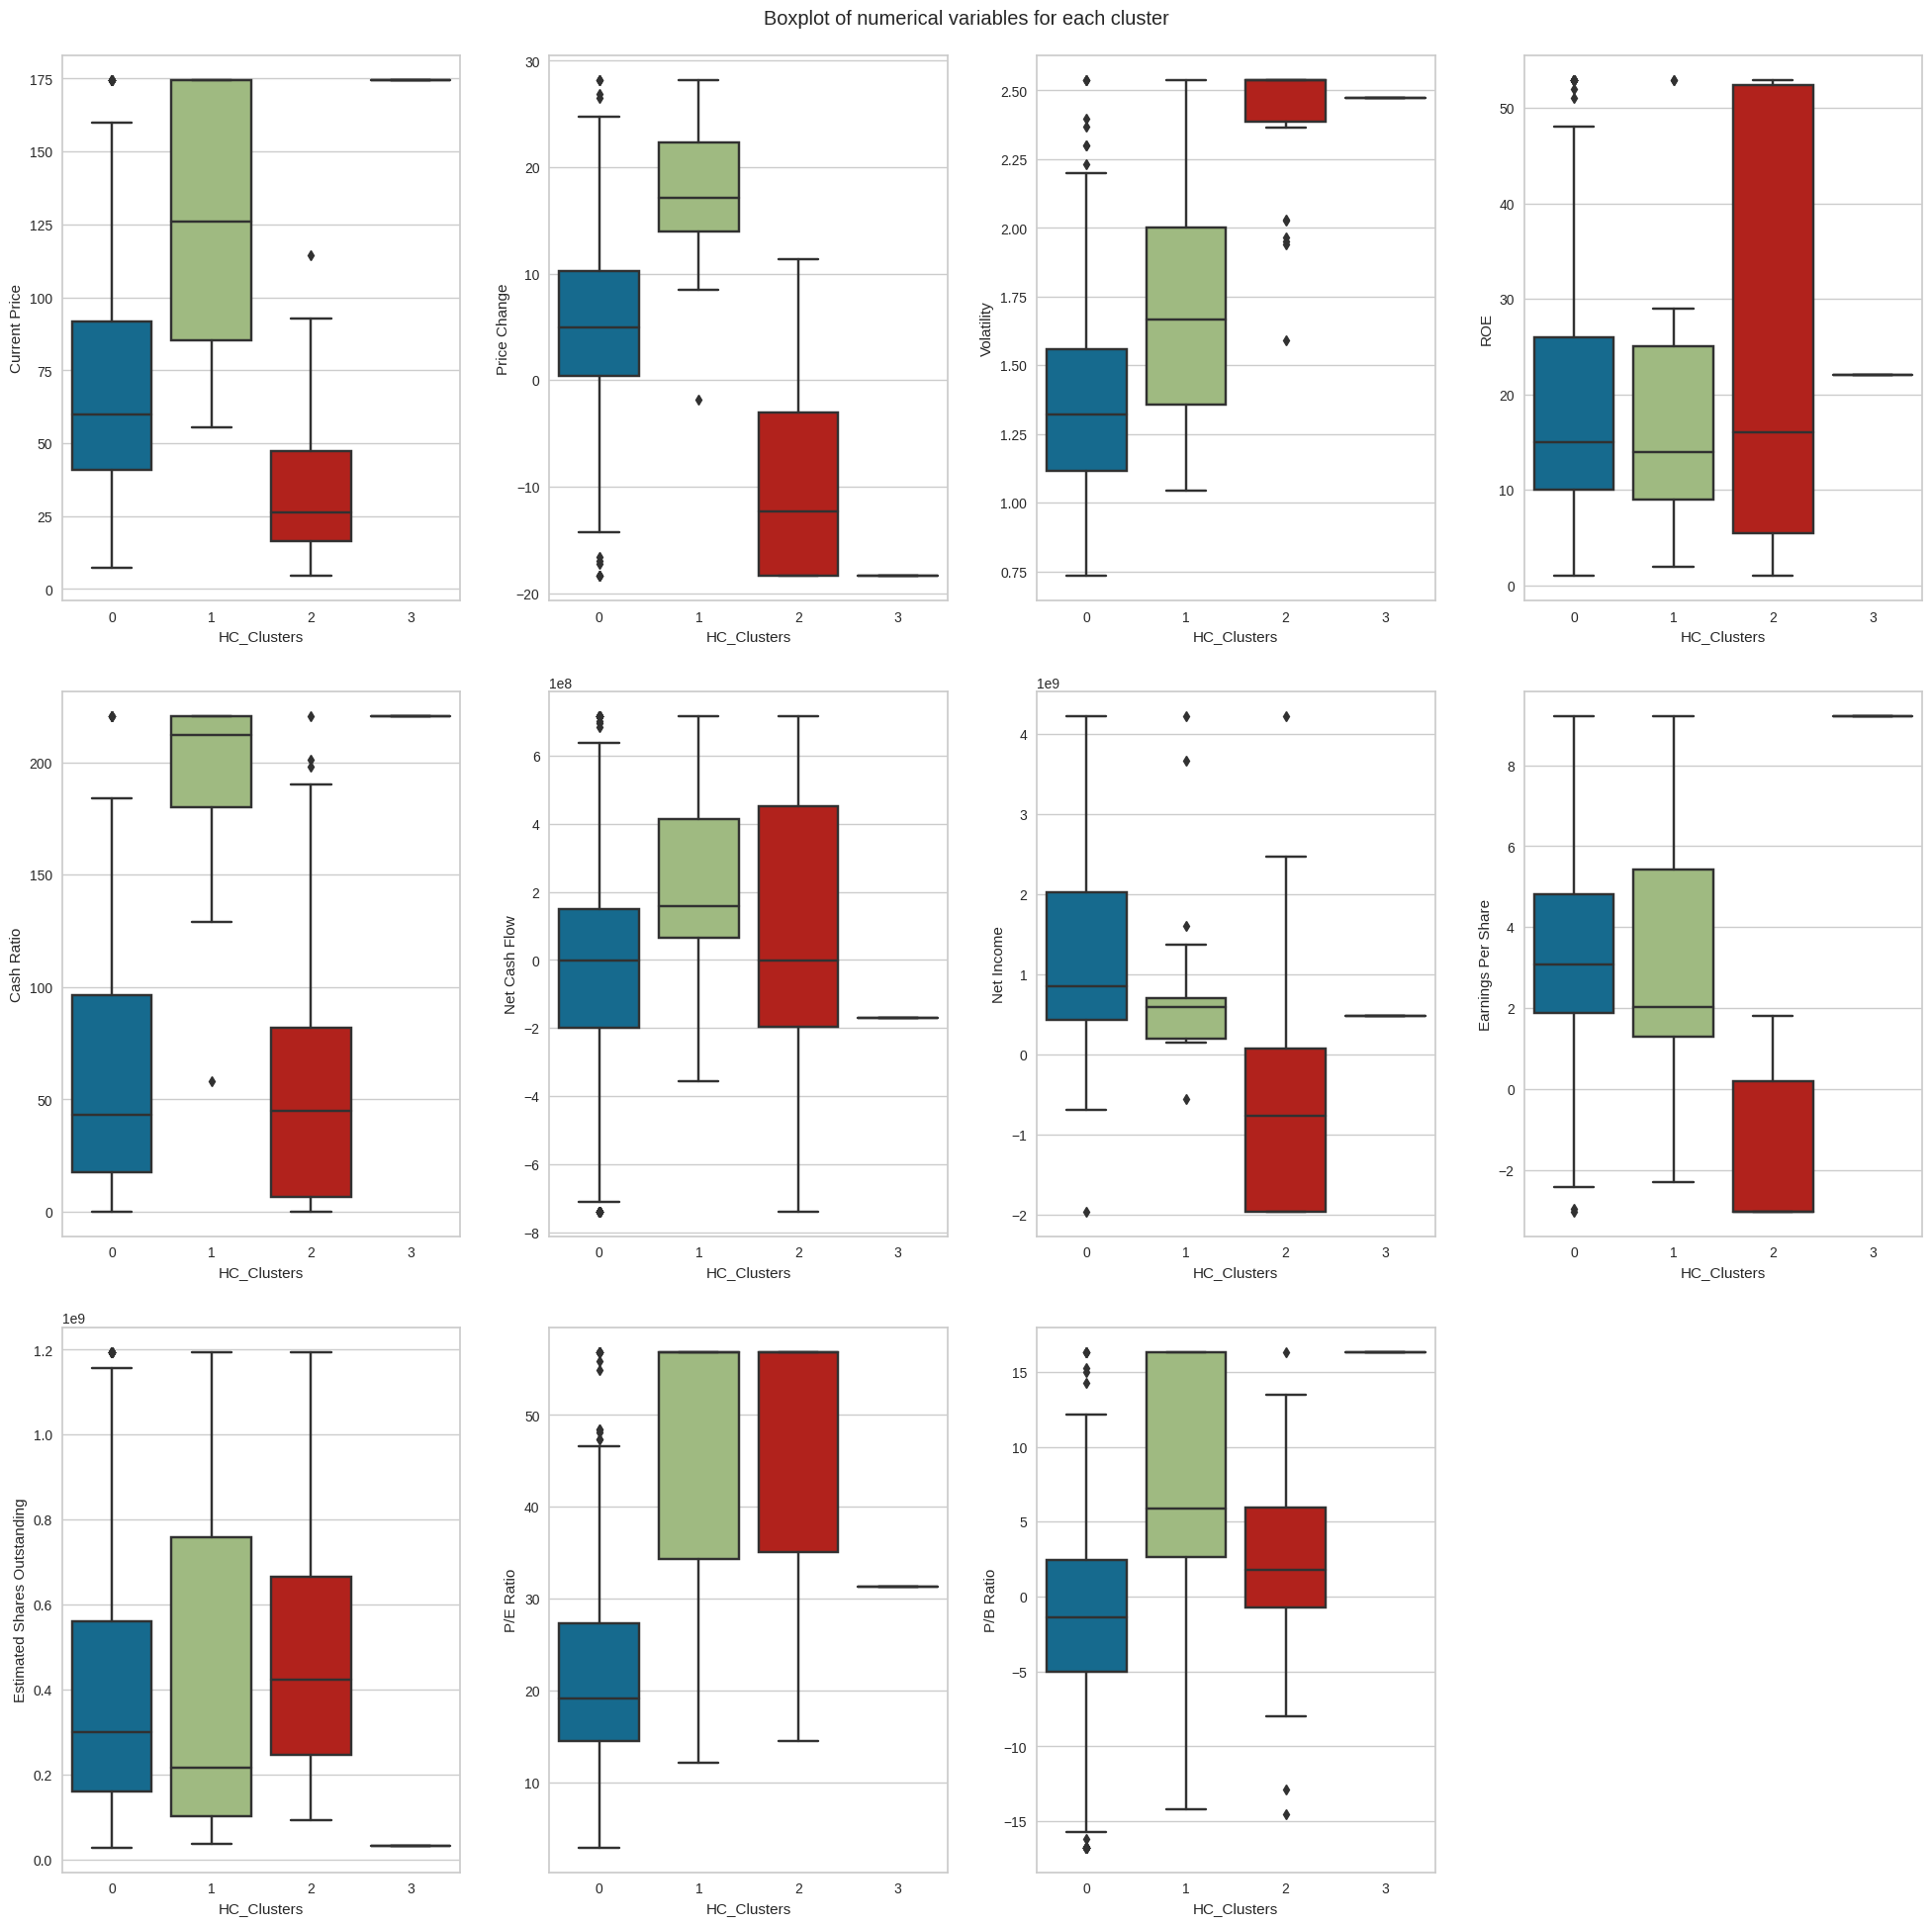

In [80]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df3, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

###<font color = 'blue'> Insights based on the HC_Clustering

a) Cluster 0 shows diverse representation of sectors and has the highest count of companies, with 291 companies. This indicates that a significant portion of the dataset belongs to this cluster.

b) In terms of sector distribution or concentration of companies within Cluster 0, the 3 top represented sectors are Industrials (53 companies), Financials (49 companies), and Health Care (32 companies).

c) Cluster 1 and 2 has a smaller number of sectors, 17 and 31 companies respectively compared to Cluster 0.

d) Top 3 secotrs in Cluster 1 are : Health Care (8), and Information Technology(5) and Consumer Discretionary (3). Top 3 sectors in Cluster 2 primarily consists of Energy (24), Information Technology (4) and Materials sectors (2).

e) Cluster 3 only includes 1 sector - Consumer Discretionary (Food BEverage)

f) Cluster 2 shows a significant representation of the Energy sector, with 24 companies. This indicates a higher concentration of energy-related companies within Cluster 2 compared to other sectors.

g)  Cluster 1 is characterized by having the highest count of companies in the Health Care sector

h) Clusters with 0 companies indicate that there were no companies that fit the criteria or met the similarity thresholds to be assigned to those clusters.



## K-means vs Hierarchical Clustering (Comparison)

**Comparison over several things :**

<font color = 'brown'> Q1. Which clustering technique took less time for execution?</font>
- The hierarchical clustering (HC) Agglomerative clustering model had a faster execution time compared to the K-Means clustering technique. It's important to note that these times can vary depending on the implementation, hardware, dataset size, and complexity of the data.
- The HC model had a total of 6.9 milliseconds(ms) and a Wall time of 6.94 ms to execute, while the K-Means model took a total of 59.5 ms and a Wall time of 36.2 ms to execute.

<font color = 'brown'> Q2. Which clustering technique gave you more distinct clusters, or are they the same?</font>
- In terms of the number of distinct clusters, HC clustering yielded more clusters (4 clusters) compared to K-means clustering (3 clusters).

<font color = 'brown'> Q3. How many observations are there in the similar clusters of both algorithms?
- From the deduced profiling information, we can see that the cluster labels are not aligned between the two algorithms (Kmeans has  clusters labeled as 0, 1, and 2 and HC has Clusters labeled as 0, 1, 2, and 3)
- We shall however examine some of the similarity between clusters from both algorithms by comparing the sectors associated with each cluster.
- From the given information, we can make some observation :
  - Cluster 2 in the KMeans algorithm has one similar sector distribution/observation to Cluster 3 in the Hierarchical Clustering Agglomerative algorithm.
  - Based on the similarity of sector distributions, we can estimate that there are observations from 82 companies (Cluster 0 in KMeans) in a similar cluster with 291 companies (Cluster 0 in Hierarchical Clustering Agglomerative).
  - There are similarity between (Cluster 0 in KMeans) with (Cluster 2 in Hierarchical Clustering) and (Cluster 1 in KMeans) with (Cluster 1 in Hierarchical Clustering) and Cluster 2 in KMeans) with (Cluster 3 in Hierarchical Clustering)
  - A simple code has been written to show the similarity and difference of the companies(observations) between the two algorthms.

<font color = 'brown'> Q4. How many clusters are obtained as the appropriate number of clusters from both algorithms?
- From the crosstab, we can say that  HC clustering yielded (4 clusters) compared to K-means (3 clusters).


In [81]:
# Q3. How many observations are there in the similar clusters of both algorithms?
# this code is for selected sector analysis only. The cross tab provides further analysis.

kmeans_cluster_companies = {}
for cl in df2["K_means_segments"].unique():
    companies = df2[df2["K_means_segments"] == cl]["Security"].unique()
    kmeans_cluster_companies[cl] = set(companies)

hc_cluster_companies = {}
for cl in df3["HC_Clusters"].unique():
    companies = df3[df3["HC_Clusters"] == cl]["Security"].unique()
    hc_cluster_companies[cl] = set(companies)

similar_clusters = []
kmeans_unique_clusters = []
hc_unique_clusters = []

for kmeans_cluster, kmeans_companies in kmeans_cluster_companies.items():
    for hc_cluster, hc_companies in hc_cluster_companies.items():
        if kmeans_companies == hc_companies:
            similar_clusters.append((kmeans_cluster, hc_cluster))
    if kmeans_cluster not in [x[0] for x in similar_clusters]:
        kmeans_unique_clusters.append(kmeans_cluster)

for hc_cluster, hc_companies in hc_cluster_companies.items():
    if hc_cluster not in [x[1] for x in similar_clusters]:
        hc_unique_clusters.append(hc_cluster)

print("Similar Clusters:")
for kmeans_cluster, hc_cluster in similar_clusters:
    print("KMeans Cluster:", kmeans_cluster)
    print("HC Cluster:", hc_cluster)
    print()

print("KMeans Unique Clusters:")
for kmeans_cluster in kmeans_unique_clusters:
    print("KMeans Cluster:", kmeans_cluster)
    print()

print("HC Unique Clusters:")
for hc_cluster in hc_unique_clusters:
    print("HC Cluster:", hc_cluster)
    print()

# Showing the specific cases mentioned
kmeans_cluster0_companies = kmeans_cluster_companies[0]
hc_cluster0_companies = hc_cluster_companies[0]
hc_cluster0_unique_companies = hc_cluster_companies[0].difference(kmeans_cluster0_companies)

kmeans_cluster2_companies = kmeans_cluster_companies[2]
hc_cluster3_companies = hc_cluster_companies[3]
hc_cluster3_unique_companies = hc_cluster_companies[3].difference(kmeans_cluster2_companies)

print("Similar Companies:")
print("Cluster 0 in KMeans algorithm:", sorted(kmeans_cluster0_companies))
print("Cluster 0 in Hierarchical Clustering Agglomerative algorithm:", sorted(hc_cluster0_companies))
print("Unique companies in Cluster 0 Hierarchical Clustering Agglomerative algorithm:", sorted(hc_cluster0_unique_companies))
print()
print("Cluster 2 in KMeans algorithm:", sorted(kmeans_cluster2_companies))
print("Cluster 3 in Hierarchical Clustering Agglomerative algorithm:", sorted(hc_cluster3_companies))
print("Unique companies in Cluster 3 Hierarchical Clustering Agglomerative algorithm:", sorted(hc_cluster3_unique_companies))


Similar Clusters:
KMeans Unique Clusters:
KMeans Cluster: 0

KMeans Cluster: 1

KMeans Cluster: 2

HC Unique Clusters:
HC Cluster: 0

HC Cluster: 1

HC Cluster: 2

HC Cluster: 3

Similar Companies:
Cluster 0 in KMeans algorithm: ['3M Company', 'AFLAC Inc', 'AT&T Inc', 'AbbVie', 'Abbott Laboratories', 'Altria Group Inc', 'American Airlines Group', 'American Express Co', 'American International Group, Inc.', 'Amgen Inc', 'Applied Materials Inc', 'BB&T Corporation', 'BIOGEN IDEC Inc.', 'Bank of America Corp', 'Boeing Company', 'Bristol-Myers Squibb', 'Broadcom', 'CSX Corp.', 'CVS Health', 'Capital One Financial', 'Caterpillar Inc.', 'Charles Schwab Corporation', 'Chevron Corp.', 'Chubb Limited', 'Citigroup Inc.', 'Coca Cola Company', 'Cognizant Technology Solutions', 'Colgate-Palmolive', 'Corning Inc.', 'Danaher Corp.', 'Delta Air Lines', 'Discover Financial Services', 'Du Pont (E.I.)', 'Duke Energy', 'Exxon Mobil Corp.', 'Facebook', 'Ford Motor', 'General Dynamics', 'General Motors', 'Gi

In [82]:
pd.crosstab(df2['GICS Sector'], [df2['K_means_segments'], df3['HC_Clusters']]).style.highlight_max(color='lightgreen', axis=0)

In [83]:
pd.crosstab(df2['Security'], [df2['K_means_segments'], df3['HC_Clusters']]).style.highlight_max(color='lightgreen', axis=0)


## Actionable Insights and Recommendations

-

<font color ='blue'> **A. INSIGHTS FROM EDA** </font>

1. Observation of GICS Sector & Sub Industry
- Top 5 economic sectors are : Industrial, Financials, Consumer Discretionary, Health Care and IT.
- Under each top 5 Economic Sector, the top 3 sub-industries are :
  - ***(Industrial Sector)*** : Industrial Conglomerates, Airlines and Industrial Machinery
  - ***(Financials Sector)*** : Banks, Property & Casualty Insurance and Diversified Financial Services
  - ***(Health Care Sector)*** : Health Care Equipment, Biotechnology and Pharmaceuticals
  - ***(Consumer Discretionary Sector)*** : Internet & Direct Marketing Retail, Hotels, Resorts & Cruise Lines and Restaurants
  - ***(Information Technology Sector)*** : Internet Software & Services, Semiconductors and IT Consulting & Other Services

2. Observation on Economic Sector and Stock Price
- Based on the average price change (percentage) in each GICS sector, Health Care experiences on average the maximum price increase. This indicates that, on average, there is positive growth in stock prices for Health Care sector companies.
- The Utilities sector has the lowest average price increase indicating relatively lower stock price growth compared to other sectors.

3. Observation on Earnings Per Share
- Consumer Discretionary sector have the highest EPS indicating that this company is generating a significant amount of net profit relative to its outstanding
- On the other hand, the lowest 3 EPS (Earnings Per Share) companies from the Energy sector with negative EPS values indicate that their earnings are lower than the number of shares outstanding. It could also suggest that these companies are currently experiencing financial challenges and may have incurred losses.

4. Observation of Economic Sector and Cash Ratio
- Sectors like IT, Telco Services and Health Care that have relatively higher average cash ratios indicate that companies in these sectors tend to have a higher proportion of cash and cash equivalents compared to their current liabilities. It also suggests that these sectors might have a more conservative approach to managing short-term obligations and maintaining liquidity.
- Sectors such as Utilities, Industrials and Materials that have lower average cash ratios can imply that companies in these sectors rely more on other sources of funding or have different cash management strategis for managing short-term obligations.

5. Observation of Economic Sector and P/E Ratio
- Sectors such as Energy, IT, Real Estate, and Health Care that have relatively higher average P/E ratios indicates investors' willingness to pay a higher price per dollar of earnings and that these sectors may be perceived as having higher growth potential or being in demand by investors.
- Sectors like Telco Services, Financials, Industrials, Utilities, and Materials having lower average P/E ratios may be perceived as having slower growth prospects or being undervalued compared to other sectors.

<font color ='blue'> **INSIGHTS FROM CLUSTER ANALYSIS**</font>

We have two clustering algorithms: K-means and Hierarchical Clustering Agglomerative (HC). Folowing key observations and insights for each algorithm:

1. K-means Algorithm:

- **Cluster Segment 0:** This segment represents securities with significant price changes, high returns on equity, strong cash flow and net income, high earnings per share, and a relatively high number of estimated shares outstanding.
- The companies in this segment are primarily from the Financials sector, followed by Industrials and Information Technology.

- **Cluster Segment 1:** This segment has the highest current prices and the highest count of securities. It includes companies from various sectors, indicating a more balanced distribution across industries.

- **Cluster Segment 2:** This segment represents securities with higher volatility in stock prices, high cash ratios, and relatively higher P/E and P/B ratios. Energy sector companies dominate this cluster.

2. Hierarchical Clustering Agglomerative Algorithm:

- **Cluster 0:** This cluster has moderate current prices, relatively low volatility, positive price changes, and diverse representation from different sectors. It has the highest net income among all clusters and the highest count of companies.

- **Cluster 1:** This cluster has the highest price changes and net cash flow. It also has a significant net income, indicating healthy profitability.

- **Cluster 2:** This cluster has lower current prices, negative price changes, higher volatility, and the highest ROE, estimated shares outstanding, and P/E ratio among all clusters. It includes companies from the Energy sector.

- **Cluster 3:** This cluster has the highest current prices, volatility, cash ratio, EPS, and P/B ratio. It represents a single company, Chipotle Mexican Grill, with unique characteristics.

3. Insights from Cluster Grouping Tabulation:

- **K-means Cluster Grouping**: Cluster 0 has a diverse mix of sectors, with notable representation from Financials, Industrials, and Information Technology. Cluster 1 shows a more balanced distribution across sectors, while Cluster 2 is dominated by Energy companies.

- **HC Cluster Grouping:** Cluster 0 has the highest count of companies and diverse sector representation, similar to K-means Cluster 0. Cluster 1 has fewer sectors represented, and Cluster 2 is primarily composed of Energy companies. Cluster 3 represents a single company from Consumer Discretionary sector, Chipotle Mexican Grill.



<font color = 'blue'> **B. RECOMMENDATIONS**

Here are some recommendations, suggestions, and advice for Trade&Ahead:

1. Utilize K-means Clustering:
- ***Scalability:*** K-means clustering is generally more computationally efficient and scalable as compared to hierarchical clustering. K-means can handle large datasets with a larger number of data points more effectively, making it suitable for analyzing extensive financial datasets that may contain numerous stocks or financial attributes.
- ***Number of clusters:*** K-means clustering requires the number of clusters to be predefined (in this case 3), whereas hierarchical clustering does not. In some cases, having control over the number of clusters can be advantageous, especially when Trade&Ahead has specific requirements or wants to create a predetermined number of investment portfolios or risk segments.
- ***Interpretability:*** The cluster assignments in K-means clustering are straightforward, with each data point assigned to the nearest centroid. This makes the interpretation of clusters relatively easier, as they are represented by a single centroid. On the other hand, hierarchical clustering produces a tree-like structure (dendrogram) that may require additional interpretation steps to determine the appropriate number of clusters and their boundaries. I had set n_clusters to different values (3, 4 and 5) a couple of times to  interpret / observe the clustering profile before concluding n = 4
- ***Speed and efficiency:*** Due to its iterative nature, K-means clustering tend to converge faster than hierarchical clustering. This can be advantageous to Trade&Ahead whom need to perform clustering analysis on a frequent or real-time basis, allowing for quicker decision-making and response to market changes.

2. Analyze the distribution:
- Identify sectors that are prominent in certain clusters. For example, in Cluster 0, Financials, Industrials, and Information Technology sectors have significant representation. Understanding the sector distribution can provide insights into the market landscape and help in selecting appropriate investment strategies.

3. Assess Risk and Valuation:
-  Analysing the characteristics of each cluster will help in gauging risk and offer proper valuation. For example, Cluster 2 in the K-means algorithm is primarily composed of Energy companies and exhibits higher volatility, cash ratios, P/E ratios, and P/B ratios. This suggests higher risk and potentially higher valuations compared to other clusters. Evaluate the risk-return trade-off and consider diversification strategies to mitigate risk while looking for potential returns.

4. Explore Hierarchical Clustering:
- Hierarchical clustering, specifically Agglomerative Clustering, offers further insights into different clusters and their characteristics. Analyse the mean maximum values in each cluster segment and compare them to gain insights. For example, Cluster 1 in Hierarchical Clustering has the highest price change and net cash flow, indicating significant price fluctuations and strong cash generation. Understanding such dynamics can help T&A in identifying potential investment opportunities.

5. Regular Monitoring and Update Clusters:
- Keep track of changes in market dynamics and sector trends. Periodically reevaluate the clusters to ensure they align with the current market conditions and the evolving investment landscape. This approach will help T&A stay informed and adjst their investment strategies accordingly.

# <font color="blue"> **APPENDIX - STUDENT NOTES**

## **A. Links for further Reading**

1. [A Beginner’s Guide to Hierarchical Clustering and how to Perform it in Python](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/#:~:text=The%20number%20of%20clusters%20will,sample%20(3%2C5).)
2. ["Introduction to Dendrograms" by DataCamp](https://projector-video-pdf-converter.datacamp.com/14739/chapter2.pdf)
3. ["Understanding Dendrogram in Scipy" by DataCamp](https://www.datacamp.com/tutorial/introduction-hierarchical-clustering-python)
